In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
import warnings
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import skew
from tabulate import tabulate
from matplotlib import pylab
warnings.filterwarnings("ignore")
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# PREPARAZIONE

In [ ]:
index = pd.read_csv("Nasdaq.csv")

In [ ]:
index = index.set_index("Dates", drop=True)
index = index.rename(columns={"PX_LAST": "NASDAQ"})
index

,NASDAQ
Dates,
4/14/2017,5353.59
4/17/2017,5399.20
4/18/2017,5391.66
4/19/2017,5399.64
4/20/2017,5443.53
...,...
6/8/2022,12615.13
6/9/2022,12269.78
6/10/2022,11832.82


In [ ]:
stocks = pd.read_csv("Nasdaq_stocks.csv")
stocks = stocks.rename(columns={"Unnamed: 0": "Date"})

In [ ]:
stocks = stocks.iloc[1:]
stocks = stocks.set_index("Date", drop=True)

In [ ]:
stocks.head()

,AAPL UW Equity,ABNB UW Equity,ADBE UW Equity,ADI UW Equity,ADP UW Equity,ADSK UW Equity,AEP UW Equity,ALGN UW Equity,AMAT UW Equity,AMD UW Equity,...,TSLA UW Equity,TXN UW Equity,VRSK UW Equity,VRSN UW Equity,VRTX UW Equity,WBA UW Equity,WDAY UW Equity,XEL UW Equity,ZM UW Equity,ZS UW Equity
Date,,,,,,,,,,,,,,,,,,,,,
4/14/2017,35.263,NaN,129.05,76.51,101.26,84.91,NaN,113.73,37.52,12.31,...,60.8,77.84,79.11,87.68,113.8,82.48,NaN,NaN,NaN,NaN
4/17/2017,35.458,NaN,129.99,76.39,101.86,85.99,NaN,115.18,38.02,12.79,...,60.288,78.72,80.07,88.84,114.81,83.13,NaN,NaN,NaN,NaN
4/18/2017,35.3,NaN,129.81,77.41,101.93,86.41,NaN,116.32,38.05,12.95,...,60.05,79.61,80.63,88.42,114.65,82.82,NaN,NaN,NaN,NaN
4/19/2017,35.17,NaN,130.22,76.99,102.07,87.93,NaN,117.55,39.25,12.84,...,61.104,79.37,80.77,88.82,114.63,83.51,NaN,NaN,NaN,NaN
4/20/2017,35.61,NaN,131.42,78.66,103.04,88.41,NaN,118.87,39.89,13.11,...,60.502,80.76,81.37,88.71,117.26,84.14,NaN,NaN,NaN,NaN


In [ ]:
stocks.columns = [ stocks.columns[i].split(' ')[0] for i in range(len(stocks.columns)) ]
stocks = stocks.drop(columns={"ABNB" , "AEP" , "AZN", "CEG", "CRWD", "DDOG", "DOCU", "EXC", "HON" , "KDP", "LCID", "MRNA", "MTCH", "PANW", "PDD", "PEP", "WDAY", "XEL", "ZM", "ZS"})
#rimuovere ABNB , AEP , AZN, CEG, CRWD, DDOG, DOCU, EXC, HON , KDP, LCID, MRNA, MTCH, PANW, PDD, PEP, WDAY, XEL, ZM, ZS perchè hanno i valori NAN
stocks.head()

,AAPL,ADBE,ADI,ADP,ADSK,ALGN,AMAT,AMD,AMGN,AMZN,...,SPLK,SWKS,TEAM,TMUS,TSLA,TXN,VRSK,VRSN,VRTX,WBA
Date,,,,,,,,,,,,,,,,,,,,,
4/14/2017,35.263,129.05,76.51,101.26,84.91,113.73,37.52,12.31,161.61,44.234,...,59.49,97.47,31.23,63.9216,60.8,77.84,79.11,87.68,113.8,82.48
4/17/2017,35.458,129.99,76.39,101.86,85.99,115.18,38.02,12.79,162.11,45.1,...,60.14,98.76,31.49,64.8199,60.288,78.72,80.07,88.84,114.81,83.13
4/18/2017,35.3,129.81,77.41,101.93,86.41,116.32,38.05,12.95,161.25,45.189,...,61.1,99.03,31.59,64.4905,60.05,79.61,80.63,88.42,114.65,82.82
4/19/2017,35.17,130.22,76.99,102.07,87.93,117.55,39.25,12.84,161.26,44.96,...,61.63,99.24,31.83,65.0096,61.104,79.37,80.77,88.82,114.63,83.51
4/20/2017,35.61,131.42,78.66,103.04,88.41,118.87,39.89,13.11,162.04,45.103,...,62.03,101.63,31.27,64.6902,60.502,80.76,81.37,88.71,117.26,84.14


In [ ]:
#Log return stocks giornalieri
stocks_ret_gio = stocks.iloc[:]
for column in stocks:
    stocks_ret_gio[column] = np.log(stocks[column].astype("float64")) - np.log(stocks[column].astype("float64").shift(1))  
stocks_ret_gio= stocks_ret_gio.iloc[1:]
print(stocks_ret_gio)

               AAPL      ADBE       ADI       ADP      ADSK      ALGN  \
Date                                                                    
4/17/2017  0.005515  0.007258 -0.001570  0.005908  0.012639  0.012669   
4/18/2017 -0.004466 -0.001386  0.013264  0.000687  0.004872  0.009849   
4/19/2017 -0.003690  0.003153 -0.005440  0.001373  0.017438  0.010519   
4/20/2017  0.012433  0.009173  0.021459  0.009458  0.005444  0.011167   
4/21/2017 -0.001180  0.000761 -0.013181 -0.003403  0.001921 -0.003624   
...             ...       ...       ...       ...       ...       ...   
6/8/2022  -0.005056 -0.010623 -0.011688 -0.010356 -0.016744 -0.001390   
6/9/2022  -0.036618 -0.005659 -0.020820 -0.019694 -0.043488 -0.039506   
6/10/2022 -0.039395 -0.079480 -0.029450 -0.019096 -0.041771 -0.021151   
6/13/2022 -0.039037 -0.057992 -0.060079 -0.032954 -0.077667 -0.052081   
6/14/2022  0.005369  0.001479  0.004524 -0.009569  0.002884 -0.026621   

               AMAT       AMD      AMGN      AMZN 

In [ ]:
stocks['AAPL'][0:180]

Date
4/14/2017     35.263
4/17/2017     35.458
4/18/2017       35.3
4/19/2017      35.17
4/20/2017      35.61
               ...  
12/15/2017    43.493
12/18/2017    44.105
12/19/2017    43.635
12/20/2017    43.588
12/21/2017    43.753
Name: AAPL, Length: 180, dtype: object

In [ ]:
#stocks_ret_set['AAPL'].head(26)

In [ ]:
#Log return stocks settimanali
indici_settimane = range(0,1346,7)
stocks_ret_set = stocks.iloc[indici_settimane]
for column in stocks:
  stocks_ret_set[column] = np.log(stocks_ret_set[column].astype("float64")) - np.log(stocks_ret_set[column].astype("float64").shift(1))
stocks_ret_set = stocks_ret_set[1:]
print(stocks_ret_set)

               AAPL      ADBE       ADI       ADP      ADSK      ALGN  \
Date                                                                    
4/25/2017  0.024372  0.033827  0.036447  0.036364  0.061767  0.043446   
5/4/2017   0.013743  0.008355 -0.047619 -0.057926  0.031925  0.177779   
5/15/2017  0.060687  0.021969  0.058399 -0.006581  0.035605 -0.024471   
5/24/2017 -0.015273  0.025260  0.023533  0.015421  0.151886  0.001371   
6/2/2017   0.013679  0.016585 -0.014844  0.009952  0.003816  0.076681   
...             ...       ...       ...       ...       ...       ...   
5/2/2022  -0.052173 -0.024711 -0.003535 -0.048330 -0.011494 -0.216726   
5/11/2022 -0.075316 -0.071119 -0.039729 -0.050449 -0.065444 -0.187346   
5/20/2022 -0.062747  0.050780  0.066494  0.000527  0.057690  0.071310   
5/31/2022  0.078594  0.042651  0.036033  0.066292  0.081918  0.009409   
6/9/2022  -0.042548  0.023586 -0.041156 -0.033014 -0.063028 -0.055884   

               AMAT       AMD      AMGN      AMZN 

In [ ]:
#Log return stocks mensili
indici_mesi = range(0,1346, 30)
stocks_ret_men = stocks.iloc[indici_mesi]
for column in stocks:
  stocks_ret_men[column] = np.log(stocks_ret_men[column].astype("float64")) - np.log(stocks_ret_men[column].astype("float64").shift(1))
stocks_ret_men = stocks_ret_men[1:]
print(stocks_ret_men)

                AAPL      ADBE       ADI       ADP      ADSK      ALGN  \
Date                                                                     
5/26/2017   0.085301  0.094852  0.079127  0.000888  0.286061  0.222704   
7/7/2017   -0.063367  0.002323 -0.053832  0.036713 -0.089822  0.067020   
8/18/2017   0.088363  0.039634 -0.009346 -0.006967  0.049472  0.104037   
9/29/2017  -0.021694  0.008144  0.102952  0.045954  0.033515  0.099609   
11/10/2017  0.125178  0.197313  0.038922  0.016061  0.092261  0.292101   
12/22/2017  0.001945 -0.037681 -0.008294  0.050807 -0.169746 -0.111589   
2/2/2018   -0.086561  0.111490  0.002922  0.014356  0.071947  0.142844   
3/16/2018   0.103602  0.142266  0.055018 -0.011963  0.195536  0.049386   
4/27/2018  -0.092326 -0.016315 -0.071195  0.022951 -0.069467 -0.047367   
6/8/2018    0.166362  0.124062  0.142021  0.121373  0.064889  0.295801   
7/20/2018  -0.001357  0.024886 -0.032688  0.014523 -0.006012  0.079566   
8/31/2018   0.173156  0.022916  0.0105

In [ ]:
#Log return indice giornalieri
index_ret_gio =  np.log(index.NASDAQ.astype("float64")) - np.log(index.NASDAQ.astype("float64").shift(1))
index_ret_gio = index_ret_gio.iloc[1:]
print(index_ret_gio)


Dates
4/17/2017    0.008483
4/18/2017   -0.001397
4/19/2017    0.001479
4/20/2017    0.008095
4/21/2017   -0.000272
               ...   
6/8/2022    -0.007624
6/9/2022    -0.027758
6/10/2022   -0.036262
6/13/2022   -0.047108
6/14/2022   -0.000874
Name: NASDAQ, Length: 1347, dtype: float64


In [ ]:
ritorni_set_index = pd.DataFrame(columns=['Ritorno_Settimanale'])
indici_settimane = range(181,1346,7)
index_3 = index.iloc[indici_settimane]
contatore_settimane = 1
for i in range(0, 166):
  row = pd.DataFrame({'Ritorno_Settimanale': np.log(index_3.NASDAQ[i+1]) - np.log(index_3.NASDAQ[i])}, index = [contatore_settimane])
  ritorni_set_index = ritorni_set_index.append(row)
  contatore_settimane = contatore_settimane + 1

In [ ]:
index_ret_men = pd.DataFrame(columns=['Ritorno'])
indici_mesi = range(181,1346,30)
index_5 = index.iloc[indici_mesi]
index_ret_men['Ritorno'] = np.log(index_5.NASDAQ.astype("float64")) - np.log(index_5.NASDAQ.astype("float64").shift(1))
index_ret_men.Ritorno[0] = 0
index_ret_men.index = range(0,len(indici_mesi))
print(index_ret_men)

     Ritorno
0   0.000000
1   0.004745
2   0.055244
3  -0.038505
4   0.081780
5   0.027966
6   0.037641
7  -0.079628
8  -0.056803
9  -0.028877
10  0.083769
11  0.058259
12 -0.020847
13  0.053031
14 -0.040607
15  0.057222
16  0.032360
17  0.030606
18  0.092558
19 -0.032770
20 -0.063382
21  0.122005
22  0.119040
23  0.062554
24  0.006699
25  0.040182
26  0.070163
27  0.043080
28 -0.012636
29  0.069646
30 -0.016046
31  0.052650
32  0.070069
33 -0.058816
34  0.107340
35  0.007347
36 -0.145407
37  0.049149
38 -0.206781


In [ ]:
index_ret_sem = pd.DataFrame(columns=['Ritorno'])
indici_semestri = range(181,1346,180)
index_4 = index.iloc[indici_semestri]
index_ret_sem['Ritorno'] = np.log(index_4.NASDAQ.astype("float64")) - np.log(index_4.NASDAQ.astype("float64").shift(1))
index_ret_sem.Ritorno[0] = 0
index_ret_sem.index = range(0,7)
print(index_ret_sem)

    Ritorno
0  0.000000
1  0.168871
2 -0.044126
3  0.225170
4  0.214146
5  0.194388
6  0.033183


result.params.NASDAQ #beta

result.params.const #alfa

result.pvalues.const #alfa sign

result.rsquared #r2

np.var(result.resid) #specific risk

(np.var(index_ret_gio[0:180]) * result.params.NASDAQ) #sistematic risk

(np.var(index_ret_gio[0:180]) * result.params.NASDAQ) + np.var(result.resid) #total risk

In [ ]:
all_beta = pd.DataFrame(columns=['Value', 'Ticker'])
#all_alpha_p = pd.DataFrame(columns=['Value', 'Ticker'])
all_alpha = pd.DataFrame(columns=['Value', 'Sign', 'Ticker'])
all_r2 = pd.DataFrame(columns=['Value', 'Ticker'])
all_specific = pd.DataFrame(columns=['Value', 'Ticker'])
all_sistematic = pd.DataFrame(columns=['Value', 'Ticker'])
all_totalrisk = pd.DataFrame(columns=['Value', 'Ticker'])
all_comb1 = pd.DataFrame(columns=['Value', 'Ticker'])
all_comb2 = pd.DataFrame(columns=['Value', 'Ticker'])

for column in stocks_ret_gio:
  X_sm = sm.add_constant(index_ret_gio[0:180-1])
  model = sm.OLS(stocks_ret_gio[column][0:180-1],X_sm)
  result = model.fit()
  row = pd.DataFrame([[result.params.NASDAQ , column]], columns=['Value', 'Ticker'])
  all_beta = all_beta.append(row)
  row = pd.DataFrame([[result.rsquared , column]], columns=['Value', 'Ticker'])
  all_r2 = all_r2.append(row)
  row = pd.DataFrame([[np.var(result.resid) , column]], columns=['Value', 'Ticker'])
  all_specific = all_specific.append(row)
  row = pd.DataFrame([[(np.var(index_ret_gio[0:180-1]) * result.params.NASDAQ) , column]], columns=['Value', 'Ticker'])
  all_sistematic = all_sistematic.append(row)
  row = pd.DataFrame([[(np.var(index_ret_gio[0:180-1]) * result.params.NASDAQ) + np.var(result.resid) , column]], columns=['Value', 'Ticker'])
  all_totalrisk = all_totalrisk.append(row)
  if result.pvalues.const < 0.15:
    row = pd.DataFrame([[result.params.const , result.pvalues.const, column]], columns=['Value', 'Sign', 'Ticker'])
    all_alpha = all_alpha.append(row)
    row = pd.DataFrame([[result.params.const / (np.var(index_ret_gio[0:180-1]) * result.params.NASDAQ) , column]], columns=['Value', 'Ticker'])
    all_comb1 = all_comb1.append(row)
    row = pd.DataFrame([[result.params.const / stocks_ret_set[column][0:24].mean(), column]], columns=['Value', 'Ticker'])
    all_comb2 = all_comb2.append(row)

# SIMULAZIONE


In [ ]:
def riskReturnIniziale(portfolio, numero_titoli):
  w = [1/numero_titoli] * numero_titoli
  tickers = portfolio.index
  cov_matrix = stocks_ret_men[tickers].cov() * 12 #var-cov matrix annualizzata
  rischio_portfolio_iniziale = np.transpose(w) @ cov_matrix @ w
  rendimento_atteso_iniziale = 0
  for i in range(0, numero_titoli):
    rendimento_atteso_iniziale = rendimento_atteso_iniziale + (w[i] * (stocks_ret_gio[tickers][0:179].mean()[i] * 252)) #ritorno annualizzato
  print('Titoli nel portfolio iniziale:\n')
  for i in range(0,numero_titoli):
    print(tickers[i])
  print('\n')
  print('Rendimento annualizzato atteso:', rendimento_atteso_iniziale)
  print('Volatilità:', np.sqrt(rischio_portfolio_iniziale))
  return np.sqrt(rischio_portfolio_iniziale), rendimento_atteso_iniziale

In [ ]:
def regressione(stocks_ret_gio,index_ret_gio,portfolio,start,endperiod,contatore_settimane,serie_ritorni,indicatore,numero_titoli):
  for i in range(start, endperiod, 7):
      tickers = portfolio.index
      all_rebalancing = pd.DataFrame(columns = ['Value', 'Ticker'])
      row = 0
      for column in stocks_ret_gio:
          X_sm = sm.add_constant(index_ret_gio[start:start+delta-1])
          model = sm.OLS(stocks_ret_gio[column][start:start+delta-1],X_sm)
          result = model.fit()
          if indicatore == 'r2':
            row = pd.DataFrame([[result.rsquared , column]], columns=['Value', 'Ticker'])
            all_rebalancing = all_rebalancing.append(row)
          elif (indicatore == 'beta' or indicatore == 'beta_best_lower'):
            row = pd.DataFrame([[result.params.NASDAQ , column]], columns=['Value', 'Ticker']) 
            all_rebalancing = all_rebalancing.append(row)
          elif indicatore == 'specific':
            row = pd.DataFrame([[np.var(result.resid), column]], columns=['Value', 'Ticker'])
            all_rebalancing = all_rebalancing.append(row)
          elif indicatore == 'sistematic':
            row = pd.DataFrame([[(np.var(index_ret_gio[start:start+delta-1]) * result.params.NASDAQ), column]], columns=['Value', 'Ticker'])
            all_rebalancing = all_rebalancing.append(row)
          elif indicatore == 'totalrisk':
            row = pd.DataFrame([[(np.var(index_ret_gio[start:start+delta-1]) * result.params.NASDAQ) + np.var(result.resid), column]], columns=['Value', 'Ticker'])
            all_rebalancing = all_rebalancing.append(row)
          elif (indicatore == 'combinazione1' and result.pvalues.const < 0.15):
            row = pd.DataFrame([[result.params.const / (np.var(index_ret_gio[start:start+delta-1]) * result.params.NASDAQ), column]], columns=['Value', 'Ticker'])
            all_rebalancing = all_rebalancing.append(row)
          elif (indicatore == 'alpha' and result.pvalues.const < 0.15):
            row = pd.DataFrame([[result.params.const , column]], columns=['Value', 'Ticker'])
            all_rebalancing = all_rebalancing.append(row)
          elif (indicatore == 'combinazione2' and result.pvalues.const < 0.15):
            settimana = ((start + delta) // 7) - 1
            row = pd.DataFrame([[result.params.const / stocks_ret_set[column][settimana], column]], columns=['Value', 'Ticker'])
            all_rebalancing = all_rebalancing.append(row)
      if (indicatore == 'beta_best_lower'):
        tickers_new_1 = all_rebalancing.sort_values(by='Value', ascending=False)[0:(int(numero_titoli/2))]['Ticker'].to_list()
        tickers_new_2 = all_rebalancing.sort_values(by='Value', ascending=True)[0:(int(numero_titoli/2))]['Ticker'].to_list()
        tickers_new = tickers_new_1 + tickers_new_2
      else: tickers_new = all_rebalancing.sort_values(by='Value', ascending=False)[0:numero_titoli]['Ticker'].to_list()
      
      ritorno_portfolio = 0
      for asset in tickers:
          adj_close_1 = float(stocks[asset].iloc[start+delta])
          adj_close_0 = float(stocks[asset].iloc[start])
          ritorno_asset = np.log(adj_close_1) - np.log(adj_close_0)
          ritorno_portfolio = ritorno_portfolio + (1/len(tickers_new)) * ritorno_asset
      portfolio = pd.DataFrame([[1/len(tickers_new)]], index=tickers_new)
      portfolio.rename(columns={0:'Weights'}, inplace=True)
      

      rendimento_atteso = 0
      for i in range(0, portfolio.shape[0]):
        rendimento_atteso = rendimento_atteso + (1/len(tickers_new)) * (stocks_ret_gio[tickers_new][0:start+delta-1].mean()[i] * 252)

      mese = ((start+delta) // 30) - 1
      cov_matrix = stocks_ret_men[tickers_new][0:mese].cov() * 12
      w = [1/len(tickers_new)] * len(tickers_new)
      rischio = np.transpose(w) @ cov_matrix @ w
      report_settimanale = pd.DataFrame({'Ritorno_Settimanale': ritorno_portfolio, 'Volatilita_Settimana_Successiva': np.sqrt(rischio), 'ER_Settimana_Successiva' : rendimento_atteso}, index = [contatore_settimane])
      serie_ritorni = serie_ritorni.append(report_settimanale)

      if contatore_settimane % 20 == 0:
          print('Settimana',contatore_settimane, '\n')
          print('Titoli nel portfolio:')
          for i in range(0,len(tickers)):
            print(tickers[i])
          print('Ritorno settimanale:', ritorno_portfolio, '\n')
          print('Portfolio per settimana successiva:')
          for i in range(0,len(tickers_new)):
            print(portfolio.index[i])
          print('\n')
          print('Rendimento atteso annualizzato:', rendimento_atteso)
          print('Volatilità annualizzata:', np.sqrt(rischio))
          print('-------------------------------------------\n')
      contatore_settimane = contatore_settimane + 1
      start = start + delta
  return serie_ritorni

In [ ]:
def simulazioneInvestimento(budget,serie_ritorni):
  rendimento_attuale = 0
  rendimento_totale = 0
  for i in range(1, serie_ritorni.shape[0]):
      rendimento_attuale = budget * (math.e**serie_ritorni.at[i, 'Ritorno_Settimanale'])
      budget = rendimento_attuale
      rendimento_totale = rendimento_totale + serie_ritorni.at[i, 'Ritorno_Settimanale'] 
      print('Settimana',i,'\n')
      print('Rendimento settimanale:', serie_ritorni.at[i, 'Ritorno_Settimanale'])
      print('Investimento attuale:',np.round(rendimento_attuale, 2),'\n')
      print('------------------------------------------\n')
  print("Rendimento totale: ",rendimento_totale)
  print("Rendimento atteso annualizzato mediano dei portafogli: ", np.median(serie_ritorni['ER_Settimana_Successiva']))
  print("Volatilità annualizzata mediana dell'investimento: ", np.median(serie_ritorni['Volatilita_Settimana_Successiva']))

## Portfolio 1: 10 titoli con R^2 maggiore


In [ ]:
tickers = all_r2.sort_values(by='Value', ascending=False)[0:10]['Ticker'].to_list()
portfolio = pd.DataFrame([[0.10]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)
volatilita,rendimento_atteso = riskReturnIniziale(portfolio, 10)

Titoli nel portfolio iniziale:

GOOG
GOOGL
META
MSFT
AAPL
AMZN
AMAT
AVGO
TXN
MCHP


Rendimento annualizzato atteso: 0.3597915973630284
Volatilità: 0.24896072212638795


In [ ]:
serie_ritorni = pd.DataFrame(columns = ['Ritorno_Settimanale', 'Volatilita_Settimana_Successiva', 'ER_Settimana_Successiva'])
start = 181
delta = 7
endperiod = 1342
contatore_settimane = 1
ritorni_1 = regressione(stocks_ret_gio,index_ret_gio,portfolio,start,endperiod,contatore_settimane,serie_ritorni,'r2',10)
settimana_0 = pd.DataFrame({'Ritorno_Settimanale': 0, 'Volatilita_Settimana_Successiva': volatilita, 'ER_Settimana_Successiva' : rendimento_atteso}, index = [0])
ritorni_1 = ritorni_1.append(settimana_0).sort_index()

Settimana 20 

Titoli nel portfolio:
META
BKNG
BIDU
MCHP
MSFT
FISV
AMZN
MAR
NFLX
ILMN
Ritorno settimanale: 0.04054756081130755 

Portfolio per settimana successiva:
CSX
IDXX
GOOG
AAPL
TMUS
META
ANSS
NFLX
KLAC
GOOGL


Rendimento atteso annualizzato: 0.28742959478565433
Volatilità annualizzata: 0.1924805274299175
-------------------------------------------

Settimana 40 

Titoli nel portfolio:
INTC
CDNS
COST
SBUX
CSCO
VRSK
MAR
ADBE
MSFT
JD
Ritorno settimanale: 0.021659509437073024 

Portfolio per settimana successiva:
INTU
ADBE
MSFT
GOOG
GOOGL
ILMN
SPLK
VRSN
WBA
CTSH


Rendimento atteso annualizzato: 0.23347096053050645
Volatilità annualizzata: 0.1747429151338375
-------------------------------------------

Settimana 60 

Titoli nel portfolio:
META
SWKS
SNPS
AVGO
AMZN
AAPL
MSFT
MNST
ADI
LRCX
Ritorno settimanale: -0.09691485130408505 

Portfolio per settimana successiva:
ANSS
COST
MNST
GOOGL
TMUS
MRVL
GOOG
ADBE
SBUX
EBAY


Rendimento atteso annualizzato: 0.1837088981784548
Volatilità annu

In [ ]:
simulazioneInvestimento(100,ritorni_1)

Settimana 1 

Rendimento settimanale: 0.024383322152550905
Investimento attuale: 102.47 

------------------------------------------

Settimana 2 

Rendimento settimanale: 0.013616499960877703
Investimento attuale: 103.87 

------------------------------------------

Settimana 3 

Rendimento settimanale: 0.04192602712377612
Investimento attuale: 108.32 

------------------------------------------

Settimana 4 

Rendimento settimanale: 0.007210902401280528
Investimento attuale: 109.1 

------------------------------------------

Settimana 5 

Rendimento settimanale: -0.060244008677769426
Investimento attuale: 102.73 

------------------------------------------

Settimana 6 

Rendimento settimanale: 0.04416001256346132
Investimento attuale: 107.36 

------------------------------------------

Settimana 7 

Rendimento settimanale: 0.034140694051603936
Investimento attuale: 111.09 

------------------------------------------

Settimana 8 

Rendimento settimanale: 0.04048583308767619
Invest

In [ ]:
ritorni_1.describe()

,Ritorno_Settimanale,Volatilita_Settimana_Successiva,ER_Settimana_Successiva
count,167.000000,167.000000,167.000000
mean,0.004426,0.214160,0.250827
std,0.041197,0.039805,0.069726
min,-0.133592,0.106352,-0.016657
25%,-0.013371,0.189705,0.203217
50%,0.010695,0.213631,0.257908
75%,0.032521,0.244854,0.300133
max,0.111621,0.311610,0.422089


Text(0.5, 1.0, 'Weekly Returns R^2')

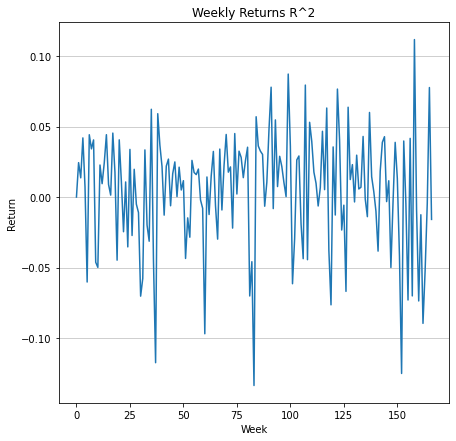

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
(ritorni_1['Ritorno_Settimanale']).plot()
stringa='Weekly Returns R^2'
plt.grid(axis='y', alpha=0.75)
plt.xlabel("Week")
plt.ylabel("Return")
plt.title(stringa)

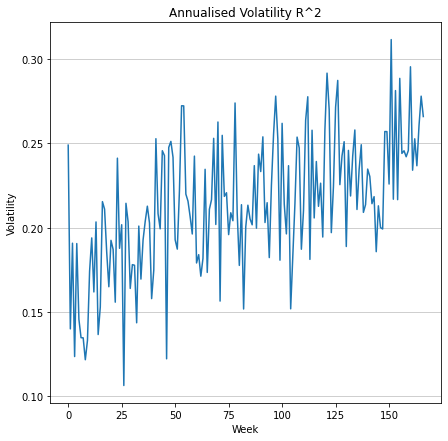

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_1['Volatilita_Settimana_Successiva'])
plt.grid(axis='y', alpha=0.75)
plt.title("Annualised Volatility R^2")
plt.xlabel("Week")
plt.ylabel("Volatility")
plt.show()

Text(0, 0.5, 'Frequency')

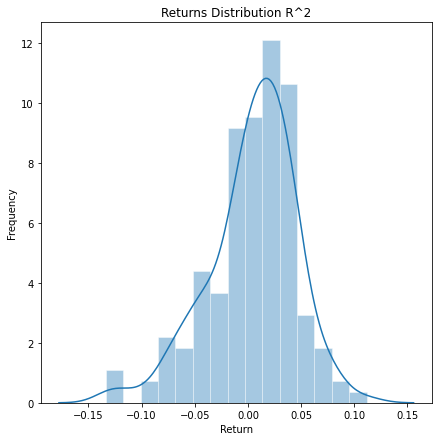

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
stringa='Returns Distribution R^2'
plt.title(stringa)
sns.set_style('darkgrid')
sns.distplot(ritorni_1['Ritorno_Settimanale'])
plt.xlabel("Return")
plt.ylabel("Frequency")

In [ ]:
skew(ritorni_1['Ritorno_Settimanale']) #asimmetria negativa

-0.6996207208425065

In [ ]:
SW=stats.shapiro(ritorni_1['Ritorno_Settimanale'])
p_value=SW[1]
if p_value<=0.05:
    print("l'ipotesi nulla di normalità è rifiutata")
else:
    print("l'ipotesi nulla di normalità è accettata")

l'ipotesi nulla di normalità è rifiutata


In [ ]:
p_value

0.00038578768726438284

Text(0.5, 1.0, 'QQ plot distribuzione rendimenti R^2')

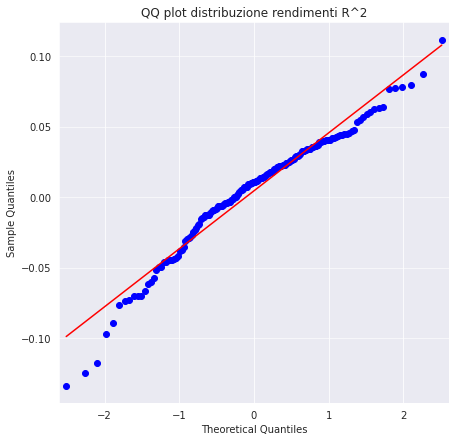

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
sm.qqplot(ritorni_1['Ritorno_Settimanale'],line='s',dist=stats.norm)
stringa='QQ plot distribuzione rendimenti R^2'
plt.grid(axis='y', alpha=0.75)
plt.title(stringa)

In [ ]:
#Il Value at Risk (VaR) rappresenta la massima perdita potenziale di un asset o di un portafoglio dato un determinato orizzonte temporale e uno specifico intervallo di confidenza
var_90=ritorni_1['Ritorno_Settimanale'].quantile(0.1)
var_95=ritorni_1['Ritorno_Settimanale'].quantile(0.05)
var_99=ritorni_1['Ritorno_Settimanale'].quantile(0.01)
print(tabulate([["90%",var_90],["95%",var_95],["99%",var_99]],
                headers=['livello di confidenza','value at risk']))

livello di confidenza      value at risk
-----------------------  ---------------
90%                           -0.0498867
95%                           -0.070222
99%                           -0.120024


In [ ]:
ritorno_max=ritorni_1.iloc[ritorni_1['Ritorno_Settimanale'].astype(float).idxmax()]
ritorno_max

Ritorno_Settimanale                0.111621
Volatilita_Settimana_Successiva    0.242081
ER_Settimana_Successiva            0.180510
Name: 158, dtype: float64

In [ ]:
rischio_min=ritorni_1.iloc[ritorni_1['Volatilita_Settimana_Successiva'].astype(float).idxmin()]
rischio_min

Ritorno_Settimanale               -0.027249
Volatilita_Settimana_Successiva    0.106352
ER_Settimana_Successiva            0.284767
Name: 26, dtype: float64

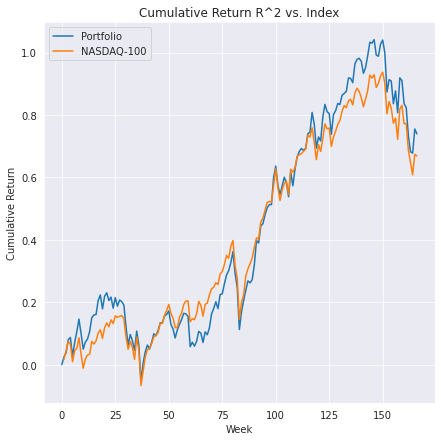

In [ ]:
plt.figure(figsize=(7, 7))
cdf_p=np.cumsum(ritorni_1['Ritorno_Settimanale'])
cdf_i=np.cumsum(ritorni_set_index['Ritorno_Settimanale'])
plt.plot(cdf_p,label="Portfolio")
plt.plot(cdf_i,label="NASDAQ-100")
plt.xlabel("Week")
plt.ylabel("Cumulative Return")
plt.legend()
plt.title("Cumulative Return R^2 vs. Index")
plt.show()


## Portfolio 2: 10 titoli con Beta Maggiore

In [ ]:
tickers = all_beta.sort_values(by='Value', ascending=False)[0:10]['Ticker'].to_list()
portfolio = pd.DataFrame([[0.10]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)
rischio,rendimento_atteso = riskReturnIniziale(portfolio, 10)

Titoli nel portfolio iniziale:

NVDA
AMD
MU
AMAT
MELI
LRCX
NFLX
ALGN
JD
AVGO


Rendimento annualizzato atteso: 0.5098268441658039
Volatilità: 0.3530021715457401


In [ ]:
serie_ritorni = pd.DataFrame(columns = ['Ritorno_Settimanale', 'Volatilita_Settimana_Successiva', 'ER_Settimana_Successiva'])
contatore_settimane = 1
start = 181
delta = 7
endperiod = 1342
ritorni_2 = regressione(stocks_ret_gio,index_ret_gio,portfolio,start,endperiod,contatore_settimane,serie_ritorni, 'beta',10)
settimana_0 = pd.DataFrame({'Ritorno_Settimanale': 0, 'Volatilita_Settimana_Successiva': rischio, 'ER_Settimana_Successiva' : rendimento_atteso}, index = [0])
ritorni_2 = ritorni_2.append(settimana_0).sort_index()

Settimana 20 

Titoli nel portfolio:
NFLX
MU
OKTA
NTES
AMD
NXPI
NVDA
ADSK
MELI
ASML
Ritorno settimanale: 0.038595609136996514 

Portfolio per settimana successiva:
BIIB
MU
AMD
TSLA
META
NVDA
LRCX
NFLX
GOOGL
GOOG


Rendimento atteso annualizzato: 0.3632847166199814
Volatilità annualizzata: 0.2186682227907803
-------------------------------------------

Settimana 40 

Titoli nel portfolio:
AMD
SWKS
AAPL
JD
OKTA
NVDA
AMAT
MCHP
KLAC
INTC
Ritorno settimanale: 0.036118255429228134 

Portfolio per settimana successiva:
JD
SPLK
ISRG
BIDU
ILMN
GOOGL
NTES
AMZN
ADBE
IDXX


Rendimento atteso annualizzato: 0.1921042525429141
Volatilità annualizzata: 0.2423767721601629
-------------------------------------------

Settimana 60 

Titoli nel portfolio:
CSX
TXN
MELI
AMAT
ADI
MCHP
LRCX
CDNS
AMD
SWKS
Ritorno settimanale: -0.11869653172173834 

Portfolio per settimana successiva:
GOOG
GOOGL
SBUX
TEAM
AMD
TMUS
SPLK
FISV
SWKS
NVDA


Rendimento atteso annualizzato: 0.22984135398360162
Volatilità annualizzata:

In [ ]:
simulazioneInvestimento(100,ritorni_2)

Settimana 1 

Rendimento settimanale: 0.04783790073099064
Investimento attuale: 104.9 

------------------------------------------

Settimana 2 

Rendimento settimanale: 0.006352293173218416
Investimento attuale: 105.57 

------------------------------------------

Settimana 3 

Rendimento settimanale: 0.03712982816236954
Investimento attuale: 109.56 

------------------------------------------

Settimana 4 

Rendimento settimanale: -0.017903235337940027
Investimento attuale: 107.62 

------------------------------------------

Settimana 5 

Rendimento settimanale: -0.07981950890087633
Investimento attuale: 99.36 

------------------------------------------

Settimana 6 

Rendimento settimanale: 0.043012359772106115
Investimento attuale: 103.73 

------------------------------------------

Settimana 7 

Rendimento settimanale: 0.01663565097096149
Investimento attuale: 105.47 

------------------------------------------

Settimana 8 

Rendimento settimanale: 0.07273477220552817
Investim

In [ ]:
ritorni_2.describe()

,Ritorno_Settimanale,Volatilita_Settimana_Successiva,ER_Settimana_Successiva
count,167.000000,167.000000,167.000000
mean,0.003453,0.258769,0.274699
std,0.053981,0.044839,0.093286
min,-0.177153,0.132243,0.002094
25%,-0.023261,0.231250,0.221864
50%,0.006032,0.263249,0.279922
75%,0.038635,0.291487,0.336504
max,0.172058,0.388973,0.509827


Text(0.5, 1.0, 'Weekly Returns Beta Max')

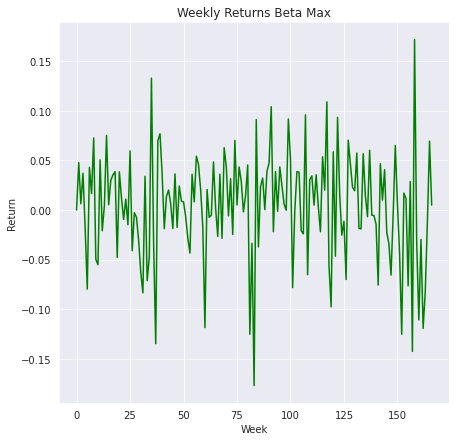

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_2['Ritorno_Settimanale'],color="green")
stringa='Weekly Returns Beta Max'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Return')
plt.title(stringa)

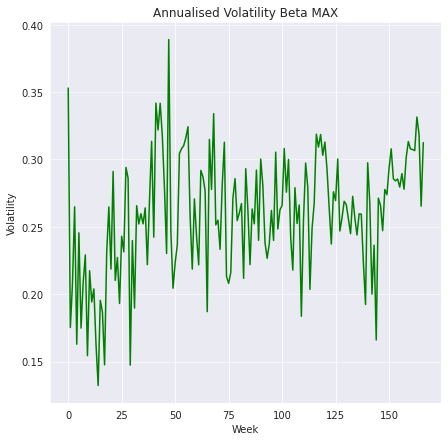

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_2['Volatilita_Settimana_Successiva'],color="green")
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Volatility')
plt.title("Annualised Volatility Beta MAX")
pylab.show()

Text(0, 0.5, 'Frequency')

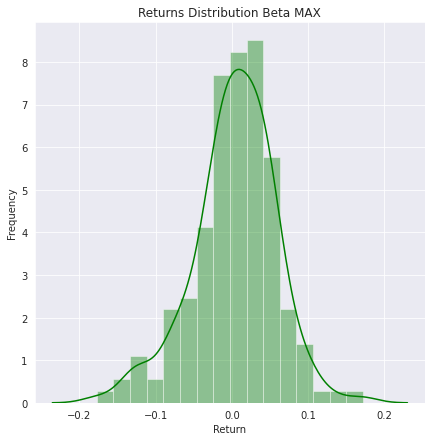

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
stringa='Returns Distribution Beta MAX'
plt.title(stringa)
sns.set_style('darkgrid')
sns.distplot(ritorni_2['Ritorno_Settimanale'],color="green")
plt.xlabel('Return')
plt.ylabel('Frequency')

In [ ]:
skew(ritorni_2['Ritorno_Settimanale']) #asimmetria negativa

-0.44309884116968573

In [ ]:
SW=stats.shapiro(ritorni_2['Ritorno_Settimanale'])
p_value=SW[1]
if p_value<=0.05:
    print("l'ipotesi nulla di normalità è rifiutata")
else:
    print("l'ipotesi nulla di normalità è accettata")

l'ipotesi nulla di normalità è rifiutata


Text(0.5, 1.0, 'QQ plot distribuzione rendimenti Beta')

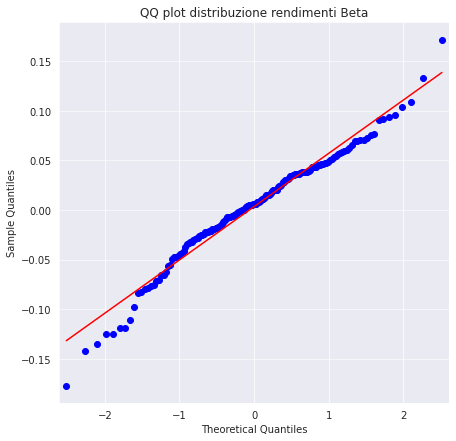

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
sm.qqplot(ritorni_2['Ritorno_Settimanale'],line='s',dist=stats.norm,)
stringa='QQ plot distribuzione rendimenti Beta'
plt.grid(axis='y', alpha=0.75)
plt.title(stringa)

In [ ]:
#Il Value at Risk (VaR) rappresenta la massima perdita potenziale di un asset o di un portafoglio dato un determinato orizzonte temporale e uno specifico intervallo di confidenza
var_90=ritorni_2['Ritorno_Settimanale'].quantile(0.1)
var_95=ritorni_2['Ritorno_Settimanale'].quantile(0.05)
var_99=ritorni_2['Ritorno_Settimanale'].quantile(0.01)
print(tabulate([["90%",var_90],["95%",var_95],["99%",var_99]],
                headers=['livello di confidenza','value at risk']))

livello di confidenza      value at risk
-----------------------  ---------------
90%                           -0.067483
95%                           -0.0934968
99%                           -0.137609


In [ ]:
ritorno_max=ritorni_2.iloc[ritorni_2['Ritorno_Settimanale'].astype(float).idxmax()]
ritorno_max

Ritorno_Settimanale                0.172058
Volatilita_Settimana_Successiva    0.301383
ER_Settimana_Successiva            0.237126
Name: 158, dtype: float64

In [ ]:
rischio_min=ritorni_2.iloc[ritorni_2['Volatilita_Settimana_Successiva'].astype(float).idxmin()]
rischio_min

Ritorno_Settimanale                0.075307
Volatilita_Settimana_Successiva    0.132243
ER_Settimana_Successiva            0.002094
Name: 14, dtype: float64

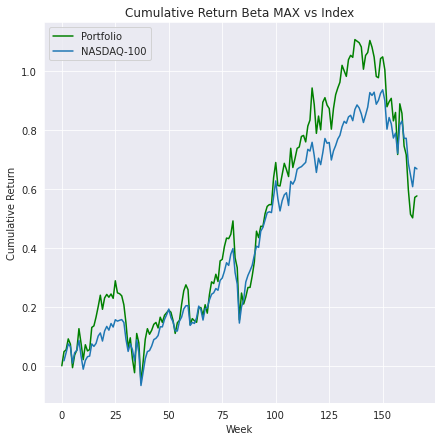

In [ ]:
plt.figure(figsize=(7, 7))
cdf_p=np.cumsum(ritorni_2['Ritorno_Settimanale'])
cdf_i=np.cumsum(ritorni_set_index['Ritorno_Settimanale'])
plt.plot(cdf_p,label="Portfolio", color = 'green')
plt.plot(cdf_i,label="NASDAQ-100")
plt.xlabel("Week")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Beta MAX vs Index")
plt.legend()
plt.show()


## Portfolio 3: 5 titoli con Beta Maggiore e 5 titoli con Beta Minore

In [ ]:
tickers3_1 = all_beta.sort_values(by='Value', ascending=False)[0:5]['Ticker'].to_list()
tickers3_2 = all_beta.sort_values(by='Value', ascending=True)[0:5]['Ticker'].to_list()
tickers3 = tickers3_1 + tickers3_2
portfolio = pd.DataFrame([[0.10]], index=tickers3)
portfolio.rename(columns={0:'Weights'}, inplace=True)
rischio,rendimento_atteso = riskReturnIniziale(portfolio, 10)

Titoli nel portfolio iniziale:

NVDA
AMD
MU
AMAT
MELI
ORLY
ROST
NXPI
DLTR
COST


Rendimento annualizzato atteso: 0.3642187754556835
Volatilità: 0.2667879647247715


In [ ]:
serie_ritorni = pd.DataFrame(columns = ['Ritorno_Settimanale', 'Volatilita_Settimana_Successiva', 'ER_Settimana_Successiva'])
contatore_settimane = 1
start = 181
delta = 7
endperiod = 1342
ritorni_3 = regressione(stocks_ret_gio,index_ret_gio,portfolio,start,endperiod,contatore_settimane,serie_ritorni, 'beta_best_lower',10)
settimana_0 = pd.DataFrame({'Ritorno_Settimanale': 0, 'Volatilita_Settimana_Successiva': rischio, 'ER_Settimana_Successiva' : rendimento_atteso}, index = [0])
ritorni_3 = ritorni_3.append(settimana_0).sort_index()

Settimana 20 

Titoli nel portfolio:
NFLX
MU
OKTA
NTES
AMD
SBUX
COST
MNST
DLTR
AMGN
Ritorno settimanale: 0.03968146610004619 

Portfolio per settimana successiva:
BIIB
MU
AMD
TSLA
META
CHTR
CPRT
SGEN
CTSH
ROST


Rendimento atteso annualizzato: 0.2298259963091395
Volatilità annualizzata: 0.14947650665873047
-------------------------------------------

Settimana 40 

Titoli nel portfolio:
AMD
SWKS
AAPL
JD
OKTA
ORLY
GILD
CMCSA
LULU
BIIB
Ritorno settimanale: 0.0423072698871517 

Portfolio per settimana successiva:
JD
SPLK
ISRG
BIDU
ILMN
QCOM
LULU
DLTR
NVDA
PCAR


Rendimento atteso annualizzato: 0.1933197710252386
Volatilità annualizzata: 0.25165586927853456
-------------------------------------------

Settimana 60 

Titoli nel portfolio:
CSX
TXN
MELI
AMAT
ADI
SGEN
CTAS
FTNT
TSLA
ALGN
Ritorno settimanale: -0.06802624211703769 

Portfolio per settimana successiva:
GOOG
GOOGL
SBUX
TEAM
AMD
FTNT
AMGN
ALGN
EA
VRTX


Rendimento atteso annualizzato: 0.23724913203378206
Volatilità annualizzata: 0.

In [ ]:
simulazioneInvestimento(100,ritorni_3)

Settimana 1 

Rendimento settimanale: 0.03416063649047798
Investimento attuale: 103.48 

------------------------------------------

Settimana 2 

Rendimento settimanale: 0.005337359749437343
Investimento attuale: 104.03 

------------------------------------------

Settimana 3 

Rendimento settimanale: 0.036695769667214
Investimento attuale: 107.92 

------------------------------------------

Settimana 4 

Rendimento settimanale: -0.04001396033992379
Investimento attuale: 103.68 

------------------------------------------

Settimana 5 

Rendimento settimanale: -0.06483226656757402
Investimento attuale: 97.18 

------------------------------------------

Settimana 6 

Rendimento settimanale: 0.06069657576510645
Investimento attuale: 103.26 

------------------------------------------

Settimana 7 

Rendimento settimanale: 0.03701704024180326
Investimento attuale: 107.15 

------------------------------------------

Settimana 8 

Rendimento settimanale: 0.045629858570190196
Investimen

In [ ]:
ritorni_3.describe()

,Ritorno_Settimanale,Volatilita_Settimana_Successiva,ER_Settimana_Successiva
count,167.000000,167.000000,167.000000
mean,0.003840,0.207776,0.212485
std,0.042399,0.037035,0.074541
min,-0.183071,0.097492,0.066652
25%,-0.021292,0.189782,0.168885
50%,0.007099,0.209383,0.208307
75%,0.032614,0.233127,0.257048
max,0.117511,0.278495,0.429607


Text(0.5, 1.0, 'Weekly Returns Beta Max/Min')

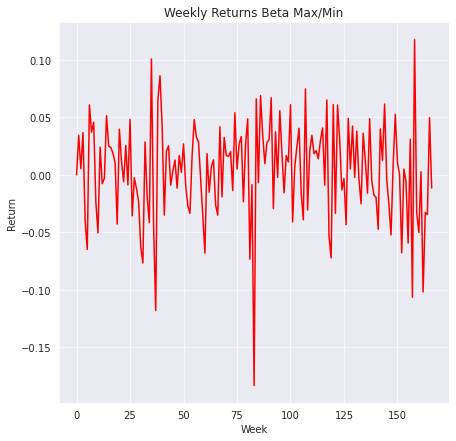

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_3['Ritorno_Settimanale'],color="red")
stringa='Weekly Returns Beta Max/Min'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Return')
plt.title(stringa)

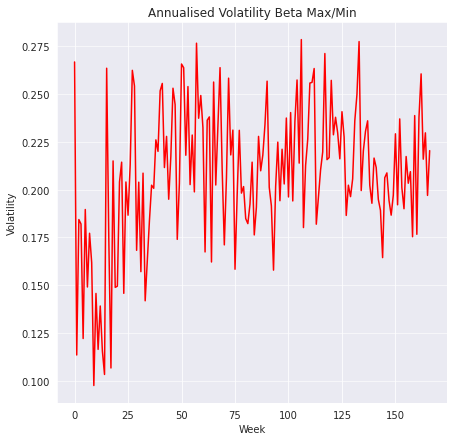

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_3['Volatilita_Settimana_Successiva'],color="red")
stringa='Annualised Volatility Beta Max/Min'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Volatility')
plt.title(stringa)
pylab.show()

Text(0, 0.5, 'Frequency')

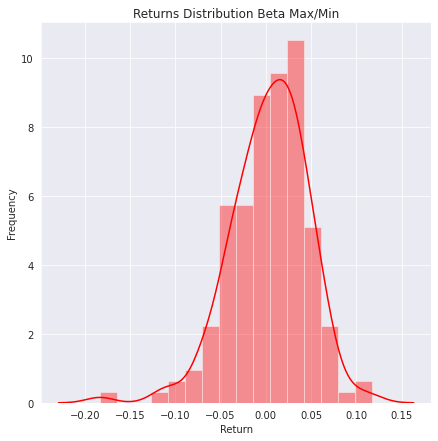

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
stringa='Returns Distribution Beta Max/Min'
plt.title(stringa)
sns.set_style('darkgrid')
sns.distplot(ritorni_3['Ritorno_Settimanale'],color="red")
plt.xlabel('Return')
plt.ylabel('Frequency')

In [ ]:
skew(ritorni_3['Ritorno_Settimanale'])

-0.6913697969506765

In [ ]:
SW=stats.shapiro(ritorni_3['Ritorno_Settimanale'])
p_value=SW[1]
if p_value<=0.05:
    print("l'ipotesi nulla di normalità è rifiutata")
else:
    print("l'ipotesi nulla di normalità è accettata")

l'ipotesi nulla di normalità è rifiutata


Text(0.5, 1.0, 'QQ plot distribuzione rendimenti Beta max/min')

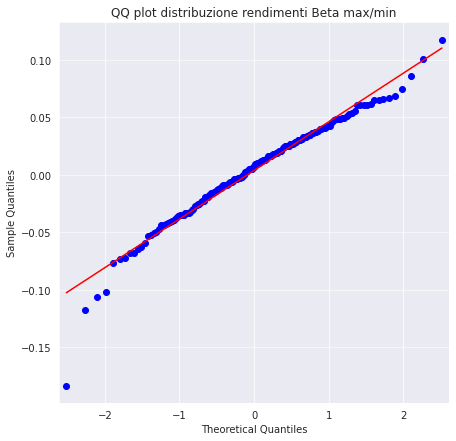

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
sm.qqplot(ritorni_3['Ritorno_Settimanale'],line='s',dist=stats.norm,color="blue")
stringa='QQ plot distribuzione rendimenti Beta max/min'
plt.grid(axis='y', alpha=0.75)
plt.title(stringa)


In [ ]:
#Il Value at Risk (VaR) rappresenta la massima perdita potenziale di un asset o di un portafoglio dato un determinato orizzonte temporale e uno specifico intervallo di confidenza
var_90=ritorni_3['Ritorno_Settimanale'].quantile(0.1)
var_95=ritorni_3['Ritorno_Settimanale'].quantile(0.05)
var_99=ritorni_3['Ritorno_Settimanale'].quantile(0.01)
print(tabulate([["90%",var_90],["95%",var_95],["99%",var_99]],
                headers=['livello di confidenza','value at risk']))

livello di confidenza      value at risk
-----------------------  ---------------
90%                            -0.045343
95%                            -0.066871
99%                            -0.110311


In [ ]:
ritorno_max=ritorni_3.iloc[ritorni_3['Ritorno_Settimanale'].astype(float).idxmax()]
ritorno_max

Ritorno_Settimanale                0.117511
Volatilita_Settimana_Successiva    0.175345
ER_Settimana_Successiva            0.094707
Name: 158, dtype: float64

In [ ]:
rischio_min=ritorni_3.iloc[ritorni_3['Ritorno_Settimanale'].astype(float).idxmin()]
rischio_min

Ritorno_Settimanale               -0.183071
Volatilita_Settimana_Successiva    0.214353
ER_Settimana_Successiva            0.107734
Name: 83, dtype: float64

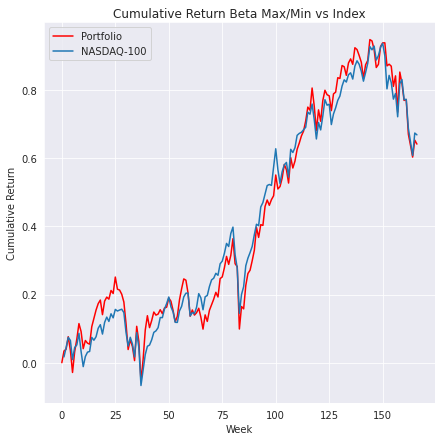

In [ ]:
cdf_p=np.cumsum(ritorni_3['Ritorno_Settimanale'])
cdf_i=np.cumsum(ritorni_set_index['Ritorno_Settimanale'])
plt.plot(cdf_p,label="Portfolio",color="red")
plt.plot(cdf_i,label="NASDAQ-100")
plt.xlabel("Week")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Beta Max/Min vs Index")
plt.legend()
plt.show()

## Portfolio 4: 5 titoli max con rapporto ALPHA/SISTEMATIC RISK maggiore. (ALPHA significativo per la soglia del 15%)

In [ ]:
tickers = all_comb1.sort_values(by='Value', ascending=False)[0:5]['Ticker'].to_list()
portfolio = pd.DataFrame([[0.20]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)
rischio,rendimento_atteso = riskReturnIniziale(portfolio, 5)

Titoli nel portfolio iniziale:

DLTR
MNST
CPRT
NXPI
ODFL


Rendimento annualizzato atteso: 0.47296486625111855
Volatilità: 0.24460792498578285


In [ ]:
serie_ritorni = pd.DataFrame(columns = ['Ritorno_Settimanale', 'Volatilita_Settimana_Successiva', 'ER_Settimana_Successiva'])
start = 181
delta = 7
endperiod = 1342
contatore_settimane = 1
ritorni_4 = regressione(stocks_ret_gio,index_ret_gio,portfolio,start,endperiod,contatore_settimane,serie_ritorni,'combinazione1',5)
settimana_0 = pd.DataFrame({'Ritorno_Settimanale': 0, 'Volatilita_Settimana_Successiva': rischio, 'ER_Settimana_Successiva' : rendimento_atteso}, index = [0])
ritorni_4 = ritorni_4.append(settimana_0).sort_index()

Settimana 20 

Titoli nel portfolio:
SBUX
META
NFLX
BIDU
ADSK
Ritorno settimanale: 0.04840711493462023 

Portfolio per settimana successiva:
BKNG
REGN
CDNS
AMGN
SNPS


Rendimento atteso annualizzato: 0.14674232622567948
Volatilità annualizzata: 0.11503122996587636
-------------------------------------------

Settimana 40 

Titoli nel portfolio:
LULU
BIIB
SGEN
MELI
EBAY
Ritorno settimanale: 0.049056263344597006 

Portfolio per settimana successiva:
OKTA
KHC
ANSS
CDNS
VRSN


Rendimento atteso annualizzato: 0.21517097832539456
Volatilità annualizzata: 0.2057063958007387
-------------------------------------------

Settimana 60 

Titoli nel portfolio:
ASML
MU
ODFL
INTC
KLAC
Ritorno settimanale: -0.08425847418608275 

Portfolio per settimana successiva:
DLTR
CHTR
FISV
VRSK
SBUX


Rendimento atteso annualizzato: 0.18079064115960614
Volatilità annualizzata: 0.13732390646807416
-------------------------------------------

Settimana 80 

Titoli nel portfolio:
PYPL
INTU
PAYX
AMZN
Ritorno settima

In [ ]:
simulazioneInvestimento(100,ritorni_4)

Settimana 1 

Rendimento settimanale: 0.0006818248661422115
Investimento attuale: 100.07 

------------------------------------------

Settimana 2 

Rendimento settimanale: 0.010384232062411501
Investimento attuale: 101.11 

------------------------------------------

Settimana 3 

Rendimento settimanale: 0.05362147577007381
Investimento attuale: 106.68 

------------------------------------------

Settimana 4 

Rendimento settimanale: -0.016945530901852735
Investimento attuale: 104.89 

------------------------------------------

Settimana 5 

Rendimento settimanale: -0.04579186684086278
Investimento attuale: 100.2 

------------------------------------------

Settimana 6 

Rendimento settimanale: 0.07484958644244977
Investimento attuale: 107.98 

------------------------------------------

Settimana 7 

Rendimento settimanale: 0.02710536003883819
Investimento attuale: 110.95 

------------------------------------------

Settimana 8 

Rendimento settimanale: 0.0346963162500312
Investi

In [ ]:
ritorni_4.describe()

,Ritorno_Settimanale,Volatilita_Settimana_Successiva,ER_Settimana_Successiva
count,167.000000,167.000000,167.000000
mean,0.005245,0.218063,0.213690
std,0.039052,0.050737,0.099446
min,-0.148400,0.062170,-0.029283
25%,-0.016062,0.186596,0.151862
50%,0.006357,0.214859,0.206298
75%,0.029199,0.246828,0.274036
max,0.110156,0.500873,0.578507


Text(0.5, 1.0, 'Weekly Returns Alpha/Systematic Risk')

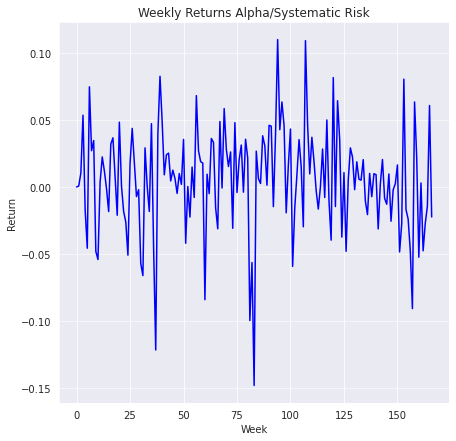

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_4['Ritorno_Settimanale'],color="blue")
stringa='Weekly Returns Alpha/Systematic Risk'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Return')
plt.title(stringa)

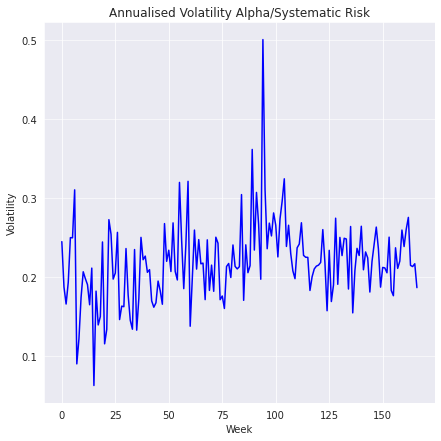

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_4['Volatilita_Settimana_Successiva'],color="blue")
stringa='Annualised Volatility Alpha/Systematic Risk'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Volatility')
plt.title(stringa)
pylab.show()

Text(0, 0.5, 'Frequency')

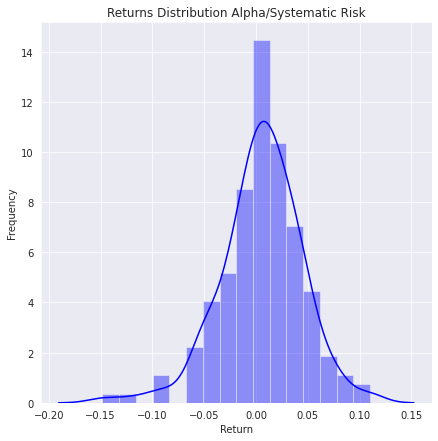

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
stringa='Returns Distribution Alpha/Systematic Risk'
plt.title(stringa)
sns.set_style('darkgrid')
sns.distplot(ritorni_4['Ritorno_Settimanale'],color="blue")
plt.xlabel('Return')
plt.ylabel('Frequency')

In [ ]:
skew(ritorni_4['Ritorno_Settimanale'])

-0.5333654525237826

In [ ]:
SW=stats.shapiro(ritorni_4['Ritorno_Settimanale'])
p_value=SW[1]
if p_value<=0.05:
    print("l'ipotesi nulla di normalità è rifiutata")
else:
    print("l'ipotesi nulla di normalità è accettata")

l'ipotesi nulla di normalità è rifiutata


Text(0.5, 1.0, 'QQ plot distribuzione rendimenti alpha/systematic')

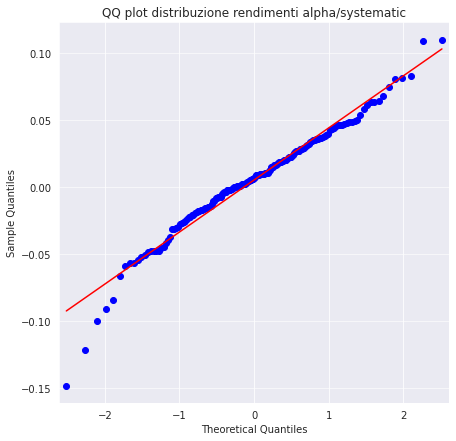

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
sm.qqplot(ritorni_4['Ritorno_Settimanale'],line='s',dist=stats.norm,color="blue")
stringa='QQ plot distribuzione rendimenti alpha/systematic'
plt.grid(axis='y', alpha=0.75)
plt.title(stringa)

In [ ]:
#Il Value at Risk (VaR) rappresenta la massima perdita potenziale di un asset o di un portafoglio dato un determinato orizzonte temporale e uno specifico intervallo di confidenza
var_90=ritorni_4['Ritorno_Settimanale'].quantile(0.1)
var_95=ritorni_4['Ritorno_Settimanale'].quantile(0.05)
var_99=ritorni_4['Ritorno_Settimanale'].quantile(0.01)
print(tabulate([["90%",var_90],["95%",var_95],["99%",var_99]],
                headers=['livello di confidenza','value at risk']))

livello di confidenza      value at risk
-----------------------  ---------------
90%                           -0.0464793
95%                           -0.055849
99%                           -0.107346


In [ ]:
ritorno_max=ritorni_4.iloc[ritorni_4['Ritorno_Settimanale'].astype(float).idxmax()]
ritorno_max

Ritorno_Settimanale                0.110156
Volatilita_Settimana_Successiva    0.500873
ER_Settimana_Successiva            0.392051
Name: 94, dtype: float64

In [ ]:
rischio_min=ritorni_4.iloc[ritorni_4['Volatilita_Settimana_Successiva'].astype(float).idxmin()]
rischio_min

Ritorno_Settimanale               -0.018399
Volatilita_Settimana_Successiva    0.062170
ER_Settimana_Successiva            0.443548
Name: 15, dtype: float64

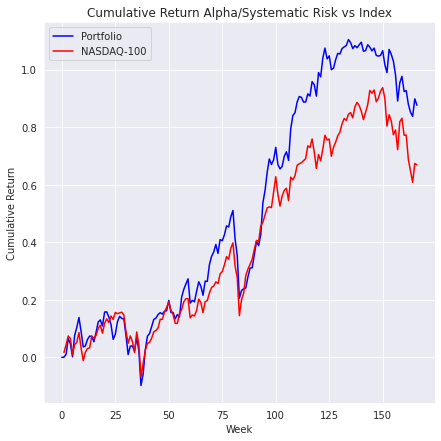

In [ ]:
cdf_p=np.cumsum(ritorni_4['Ritorno_Settimanale'])
cdf_i=np.cumsum(ritorni_set_index['Ritorno_Settimanale'])
plt.plot(cdf_p, label="Portfolio",color="blue")
plt.plot(cdf_i,label="NASDAQ-100", color='red')
plt.xlabel("Week")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Alpha/Systematic Risk vs Index")
plt.legend()
plt.show()


## Portfolio 5: 5 titoli max con rapporto ALPHA/RITORNO SETTIMANALE maggiore. (ALPHA significativo per la soglia del 15%)

In [ ]:
tickers = all_comb2.sort_values(by='Value', ascending=False)[0:5]['Ticker'].to_list()
portfolio = pd.DataFrame([[0.20]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)
rischio,rendimento_atteso = riskReturnIniziale(portfolio, 5)

Titoli nel portfolio iniziale:

SWKS
SGEN
KHC
DLTR
NXPI


Rendimento annualizzato atteso: 0.02464388804161869
Volatilità: 0.24478313027921025


In [ ]:
serie_ritorni = pd.DataFrame(columns = ['Ritorno_Settimanale', 'Volatilita_Settimana_Successiva', 'ER_Settimana_Successiva'])
start = 181
delta = 7
endperiod = 1342
contatore_settimane = 1
ritorni_5 = regressione(stocks_ret_gio,index_ret_gio,portfolio,start,endperiod,contatore_settimane,serie_ritorni,'combinazione2',5)
settimana_0 = pd.DataFrame({'Ritorno_Settimanale': 0, 'Volatilita_Settimana_Successiva': rischio, 'ER_Settimana_Successiva' : rendimento_atteso}, index = [0])
ritorni_5 = ritorni_5.append(settimana_0).sort_index()

Settimana 20 

Titoli nel portfolio:
SPLK
MCHP
SBUX
MAR
BIDU
Ritorno settimanale: 0.043191809883598525 

Portfolio per settimana successiva:
TSLA
MRVL
REGN
NXPI
ODFL


Rendimento atteso annualizzato: 0.16463683349020497
Volatilità annualizzata: 0.2100618390226969
-------------------------------------------

Settimana 40 

Titoli nel portfolio:
SGEN
LULU
EA
MELI
BIIB
Ritorno settimanale: 0.04955373898291118 

Portfolio per settimana successiva:
PCAR
LULU
OKTA
CDNS
KHC


Rendimento atteso annualizzato: 0.2157375177100076
Volatilità annualizzata: 0.17697906719223075
-------------------------------------------

Settimana 60 

Titoli nel portfolio:
SWKS
NTES
ADI
ASML
MCHP
Ritorno settimanale: -0.12281282870627816 

Portfolio per settimana successiva:
VRSK
ADSK
AMZN
GOOGL
GOOG


Rendimento atteso annualizzato: 0.22369632344046309
Volatilità annualizzata: 0.21575328305410543
-------------------------------------------

Settimana 80 

Titoli nel portfolio:
PAYX
INTU
PYPL
AMZN
Ritorno settimana

In [ ]:
simulazioneInvestimento(100,ritorni_5)

Settimana 1 

Rendimento settimanale: 0.013903624812334581
Investimento attuale: 101.4 

------------------------------------------

Settimana 2 

Rendimento settimanale: 0.02411540728481825
Investimento attuale: 103.88 

------------------------------------------

Settimana 3 

Rendimento settimanale: 0.05521804175708511
Investimento attuale: 109.77 

------------------------------------------

Settimana 4 

Rendimento settimanale: -0.016945530901852735
Investimento attuale: 107.93 

------------------------------------------

Settimana 5 

Rendimento settimanale: -0.04670598141154421
Investimento attuale: 103.0 

------------------------------------------

Settimana 6 

Rendimento settimanale: 0.0402464635041444
Investimento attuale: 107.23 

------------------------------------------

Settimana 7 

Rendimento settimanale: 0.02710536003883819
Investimento attuale: 110.18 

------------------------------------------

Settimana 8 

Rendimento settimanale: 0.036209158503774354
Investime

In [ ]:
ritorni_5.describe()

,Ritorno_Settimanale,Volatilita_Settimana_Successiva,ER_Settimana_Successiva
count,167.000000,167.000000,167.000000
mean,0.004518,0.215107,0.194390
std,0.042520,0.047307,0.083828
min,-0.139134,0.091505,0.008826
25%,-0.017204,0.187412,0.140470
50%,0.007041,0.210590,0.183079
75%,0.028188,0.243019,0.244239
max,0.169427,0.500873,0.401751


Text(0.5, 1.0, 'Weekly Returns Alpha/Weekly Return')

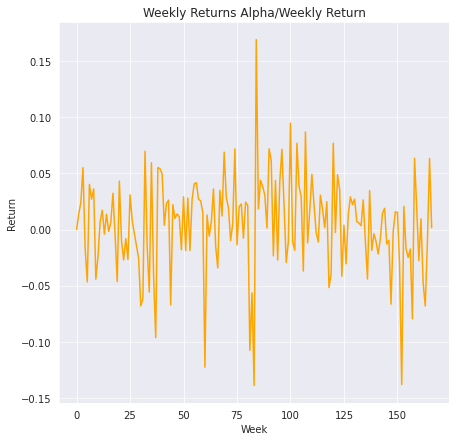

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_5['Ritorno_Settimanale'],color="orange")
stringa='Weekly Returns Alpha/Weekly Return'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Return')
plt.title(stringa)

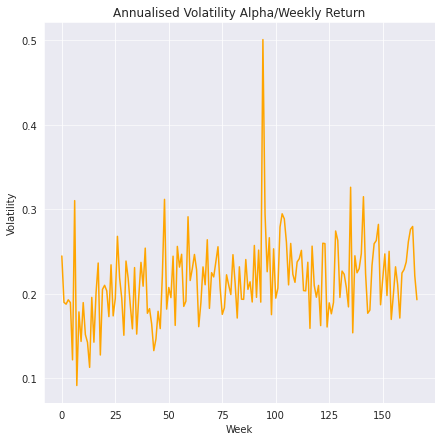

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_5['Volatilita_Settimana_Successiva'],color="orange")
stringa='Annualised Volatility Alpha/Weekly Return'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Week')
plt.ylabel('Volatility')
plt.title(stringa)
pylab.show()

Text(0, 0.5, 'Frequency')

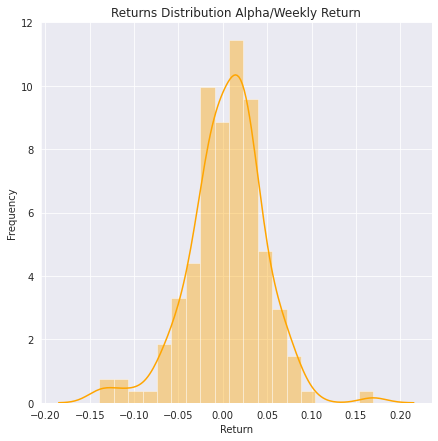

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
stringa='Returns Distribution Alpha/Weekly Return'
plt.title(stringa)
sns.set_style('darkgrid')
sns.distplot(ritorni_5['Ritorno_Settimanale'],color="orange")
plt.xlabel('Return')
plt.ylabel('Frequency')

In [ ]:
skew(ritorni_5['Ritorno_Settimanale'])

-0.364792946273212

In [ ]:
SW=stats.shapiro(ritorni_5['Ritorno_Settimanale'])
p_value=SW[1]
if p_value<=0.05:
    print("l'ipotesi nulla di normalità è rifiutata")
else:
    print("l'ipotesi nulla di normalità è accettata")

l'ipotesi nulla di normalità è rifiutata


Text(0.5, 1.0, 'QQ plot distribuzione rendimenti alpha/ret settimanale')

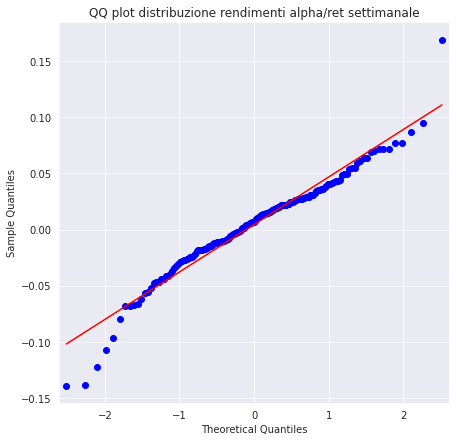

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
sm.qqplot(ritorni_5['Ritorno_Settimanale'],line='s',dist=stats.norm,color="blue")
stringa='QQ plot distribuzione rendimenti alpha/ret settimanale'
plt.grid(axis='y', alpha=0.75)
plt.title(stringa)

In [ ]:
#Il Value at Risk (VaR) rappresenta la massima perdita potenziale di un asset o di un portafoglio dato un determinato orizzonte temporale e uno specifico intervallo di confidenza
var_90=ritorni_5['Ritorno_Settimanale'].quantile(0.1)
var_95=ritorni_5['Ritorno_Settimanale'].quantile(0.05)
var_99=ritorni_5['Ritorno_Settimanale'].quantile(0.01)
print(tabulate([["90%",var_90],["95%",var_95],["99%",var_99]],
                headers=['livello di confidenza','value at risk']))

livello di confidenza      value at risk
-----------------------  ---------------
90%                           -0.0452008
95%                           -0.0670495
99%                           -0.128068


In [ ]:
ritorno_max=ritorni_5.iloc[ritorni_5['Ritorno_Settimanale'].astype(float).idxmax()]
ritorno_max

Ritorno_Settimanale                0.169427
Volatilita_Settimana_Successiva    0.193646
ER_Settimana_Successiva            0.101717
Name: 84, dtype: float64

In [ ]:
ritorno_min=ritorni_5.iloc[ritorni_5['Ritorno_Settimanale'].astype(float).idxmin()]
ritorno_min

Ritorno_Settimanale               -0.139134
Volatilita_Settimana_Successiva    0.231969
ER_Settimana_Successiva            0.199815
Name: 83, dtype: float64

In [ ]:
rischio_max=ritorni_5.iloc[ritorni_5['Volatilita_Settimana_Successiva'].astype(float).idxmax()]
rischio_max

Ritorno_Settimanale               -0.027268
Volatilita_Settimana_Successiva    0.500873
ER_Settimana_Successiva            0.392051
Name: 94, dtype: float64

In [ ]:
rischio_min=ritorni_5.iloc[ritorni_5['Volatilita_Settimana_Successiva'].astype(float).idxmin()]
rischio_min

Ritorno_Settimanale                0.027105
Volatilita_Settimana_Successiva    0.091505
ER_Settimana_Successiva            0.273577
Name: 7, dtype: float64

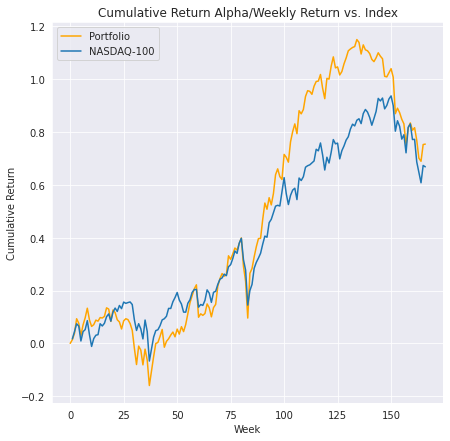

In [ ]:
cdf_p=np.cumsum(ritorni_5['Ritorno_Settimanale'])
cdf_i=np.cumsum(ritorni_set_index['Ritorno_Settimanale'])
plt.plot(cdf_p, label="Portfolio",color="orange")
plt.plot(cdf_i,label="NASDAQ-100")
plt.xlabel("Week")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Alpha/Weekly Return vs. Index")
plt.legend()
plt.show()


## Portfolio 6: MOMENTUM 6 MONTH (REB - 6 month)

In [ ]:
tickers = stocks_ret_gio[0:180].mean().sort_values(ascending=False)[0:10].index.to_list()
portfolio = pd.DataFrame([[0.10]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)

In [ ]:
rischio_iniziale,rendimento_atteso_iniziale = riskReturnIniziale(portfolio, 10)

Titoli nel portfolio iniziale:

NVDA
ALGN
PYPL
MU
ODFL
LULU
MRVL
LRCX
TEAM
MAR


Rendimento annualizzato atteso: 0.6903262326891362
Volatilità: 0.33090030547497823


In [ ]:
serie_ritorni = pd.DataFrame(columns = ['Ritorno_Semestre', 'Volatilita_Semestre_Successivo', 'ER_Semestre_Successivo'])
start = 181
delta = 180
endperiod = 1261
contatore_semestre = 1
for i in range(start, endperiod, 180):
    tickers = portfolio.index
  
    ritorno_portfolio = 0
    for asset in tickers:
        adj_close_1 = float(stocks[asset].iloc[start+delta])
        adj_close_0 = float(stocks[asset].iloc[start])
        ritorno_asset = np.log(adj_close_1) - np.log(adj_close_0)
        ritorno_portfolio = ritorno_portfolio + 0.10 * ritorno_asset 
    tickers_new = stocks_ret_gio[start:start+delta-1].mean().sort_values(ascending=False)[0:10].index.to_list()

    rendimento_atteso = 0
    for i in range(0, portfolio.shape[0]):
      rendimento_atteso = rendimento_atteso + (1/len(tickers_new)) * (stocks_ret_gio[tickers_new][0:start+delta-1].mean()[i] * 252)

    mese = ((start+delta) // 30) - 1
    cov_matrix = stocks_ret_men[tickers_new][0:mese].cov() * 12
    w = [1/len(tickers_new)] * len(tickers_new)
    rischio = np.transpose(w) @ cov_matrix @ w

    report_semestre = pd.DataFrame({'Ritorno_Semestre': ritorno_portfolio, 'Volatilita_Semestre_Successivo': np.sqrt(rischio), 'ER_Semestre_Successivo' : rendimento_atteso}, index = [contatore_semestre])
    serie_ritorni = serie_ritorni.append(report_semestre)

    portfolio = pd.DataFrame([[0.10]], index=tickers_new)
    portfolio.rename(columns={0:'Weights'}, inplace=True)

    print('Semestre',contatore_semestre, '\n')
    print('Titoli nel portfolio:')
    for i in range(0,10):
      print(tickers[i])
    print('Ritorno semestre:',ritorno_portfolio, '\n')
    print('Portfolio per semestre successivo:')
    for i in range(0,len(tickers_new)):
      print(tickers_new[i])
    print('\n')
    print('Rendimento atteso annualizzato:', rendimento_atteso)
    print('Volatilità annualizzata:', np.sqrt(rischio))
    print('-------------------------------------------\n')
    start = start + delta
    contatore_semestre = contatore_semestre + 1

semestre_0 = pd.DataFrame({'Ritorno_Semestre': 0, 'Volatilita_Semestre_Successivo': rischio_iniziale, 'ER_Semestre_Successivo' : rendimento_atteso_iniziale}, index = [0])
ritorni_6 = serie_ritorni.append(semestre_0).sort_index()

Semestre 1 

Titoli nel portfolio:
NVDA
ALGN
PYPL
MU
ODFL
LULU
MRVL
LRCX
TEAM
MAR
Ritorno semestre: 0.2598063835448292 

Portfolio per semestre successivo:
DXCM
OKTA
AMD
LULU
TEAM
NFLX
FTNT
ALGN
AMZN
ILMN


Rendimento atteso annualizzato: 0.6272524540589846
Volatilità annualizzata: 0.20685064746316753
-------------------------------------------

Semestre 2 

Titoli nel portfolio:
DXCM
OKTA
AMD
LULU
TEAM
NFLX
FTNT
ALGN
AMZN
ILMN
Ritorno semestre: 0.007935637546654429 

Portfolio per semestre successivo:
OKTA
MELI
CDNS
SBUX
TEAM
AVGO
NTES
DLTR
QCOM
VRSN


Rendimento atteso annualizzato: 0.3216414269879673
Volatilità annualizzata: 0.19290526268723976
-------------------------------------------

Semestre 3 

Titoli nel portfolio:
OKTA
MELI
CDNS
SBUX
TEAM
AVGO
NTES
DLTR
QCOM
VRSN
Ritorno semestre: 0.13802162191201323 

Portfolio per semestre successivo:
TSLA
DXCM
AMD
AAPL
SGEN
KLAC
LRCX
SWKS
AMAT
ASML


Rendimento atteso annualizzato: 0.26253556473079054
Volatilità annualizzata: 0.263314275

In [ ]:
budget = 100
ritorno_effettivo = 0
rendimento_totale = 0
for i in range(1, ritorni_6.shape[0]):
    ritorno_effettivo = budget * (math.e**ritorni_6.at[i, 'Ritorno_Semestre'])
    budget = ritorno_effettivo
    rendimento_totale = rendimento_totale + ritorni_6.at[i, 'Ritorno_Semestre'] 
    print('Semestre',i,'\n')
    print('Rendimento semestre:', ritorni_6.at[i, 'Ritorno_Semestre'])
    print('Investimento attuale:',ritorno_effettivo,'\n')
    print('------------------------------------------\n')
print("Rendimento totale: ",rendimento_totale)
print("Rendimento atteso annualizzato mediano dell'investimento: ", np.median(ritorni_6['ER_Semestre_Successivo']))
print("Volatilità mediana dell'investimento: ", np.median(ritorni_6['Volatilita_Semestre_Successivo']))


Semestre 1 

Rendimento semestre: 0.2598063835448292
Investimento attuale: 129.66790039674424 

------------------------------------------

Semestre 2 

Rendimento semestre: 0.007935637546654429
Investimento attuale: 130.7009915526976 

------------------------------------------

Semestre 3 

Rendimento semestre: 0.13802162191201323
Investimento attuale: 150.04478691919635 

------------------------------------------

Semestre 4 

Rendimento semestre: 0.38077289399575204
Investimento attuale: 219.5778244518274 

------------------------------------------

Semestre 5 

Rendimento semestre: 0.09414581301980247
Investimento attuale: 241.25453452648128 

------------------------------------------

Semestre 6 

Rendimento semestre: 0.024197928253009413
Investimento attuale: 247.1635996811049 

------------------------------------------

Rendimento totale:  0.9048802782720609
Rendimento atteso annualizzato mediano dell'investimento:  0.347766365206716
Volatilità mediana dell'investimento:  0

In [ ]:
ritorni_6.describe()

,Ritorno_Semestre,Volatilita_Semestre_Successivo,ER_Semestre_Successivo
count,7.000000,7.000000,7.000000
mean,0.129269,0.262664,0.427277
std,0.143803,0.051962,0.167335
min,0.000000,0.192905,0.262536
25%,0.016067,0.224349,0.314947
50%,0.094146,0.263314,0.347766
75%,0.198914,0.301417,0.530209
max,0.380773,0.330900,0.690326


Text(0.5, 1.0, 'Half-Yearly Returns Momentum Reb6')

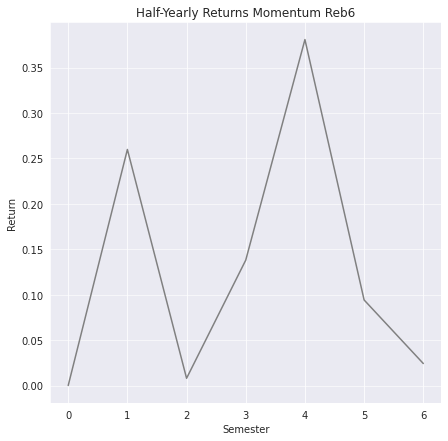

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_6['Ritorno_Semestre'],color="grey")
stringa='Half-Yearly Returns Momentum Reb6'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Semester')
plt.ylabel('Return')
plt.title(stringa)

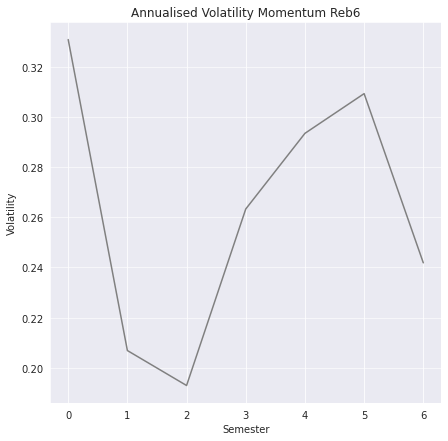

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_6['Volatilita_Semestre_Successivo'],color="grey")
stringa='Annualised Volatility Momentum Reb6'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Semester')
plt.ylabel('Volatility')
plt.title(stringa)
pylab.show()

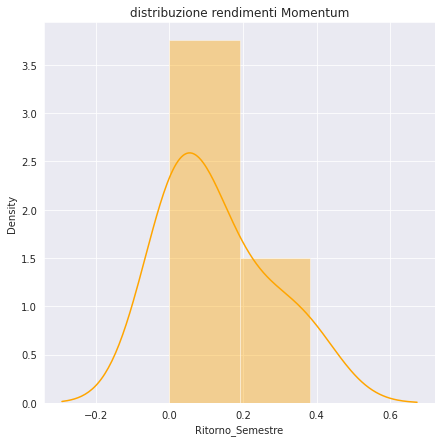

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
stringa='distribuzione rendimenti Momentum'
plt.title(stringa)
sns.set_style('darkgrid')
sns.distplot(ritorni_6['Ritorno_Semestre'],color="orange")

In [ ]:
skew(ritorni_6['Ritorno_Semestre'])

0.7860092550185904

In [ ]:
#Il Value at Risk (VaR) rappresenta la massima perdita potenziale di un asset o di un portafoglio dato un determinato orizzonte temporale e uno specifico intervallo di confidenza
var_90=ritorni_6['Ritorno_Semestre'].quantile(0.1)
var_95=ritorni_6['Ritorno_Semestre'].quantile(0.05)
var_99=ritorni_6['Ritorno_Semestre'].quantile(0.01)
print(tabulate([["90%",var_90],["95%",var_95],["99%",var_99]],
                headers=['livello di confidenza','value at risk']))

livello di confidenza      value at risk
-----------------------  ---------------
90%                          0.00476138
95%                          0.00238069
99%                          0.000476138


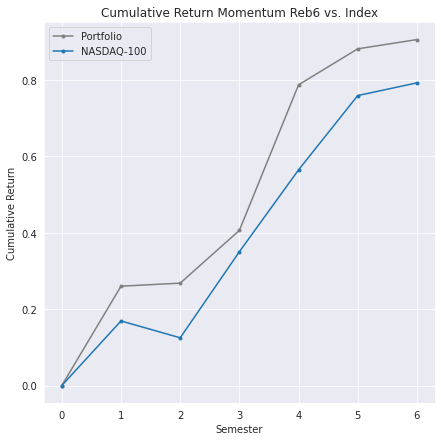

In [ ]:
#ATTENZIONE, ESSENDO REB SEMESTRALE QUI L'INVESTIMENTO HA UN ORIZZONTE TEMPORALE MINORE PER SCARSA NUMEROSITA' DATI 
cdf_p=np.cumsum(ritorni_6['Ritorno_Semestre'])
cdf_i=np.cumsum(index_ret_sem['Ritorno'])
plt.plot(cdf_p, marker=".",label="Portfolio", color="grey")
plt.plot(cdf_i,marker=".",label="NASDAQ-100")
plt.xlabel("Semester")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Momentum Reb6 vs. Index")
plt.legend()
plt.show()

## Portfolio 7: MOMENTUM 6 MONTH (REB - 1 month)

In [ ]:
tickers = stocks_ret_gio[0:180].mean().sort_values(ascending=False)[0:10].index.to_list()
portfolio = pd.DataFrame([[0.10]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)

In [ ]:
rischio_iniziale,rendimento_atteso_iniziale = riskReturnIniziale(portfolio, 10)

Titoli nel portfolio iniziale:

NVDA
ALGN
PYPL
MU
ODFL
LULU
MRVL
LRCX
TEAM
MAR


Rendimento annualizzato atteso: 0.6903262326891362
Volatilità: 0.33090030547497823


In [ ]:
serie_ritorni = pd.DataFrame(columns = ['Ritorno_Mensile', 'Volatilita_Mese_Successivo', 'ER_Mese_Successivo'])
start = 181
delta_reb = 30
delta_momentum = 180
endperiod = 1321
contatore_mese = 1
for i in range(start, endperiod, 30):
    tickers = portfolio.index
  
    ritorno_portfolio = 0
    for asset in tickers:
        adj_close_1 = float(stocks[asset].iloc[start+delta_reb])
        adj_close_0 = float(stocks[asset].iloc[start])
        ritorno_asset = np.log(adj_close_1) - np.log(adj_close_0)
        ritorno_portfolio = ritorno_portfolio + 0.10 * ritorno_asset 
    
    oggi = start + delta_reb - 1
    sei_mesi_back = oggi - 180
    tickers_new = stocks_ret_gio[sei_mesi_back:oggi].mean().sort_values(ascending=False)[0:10].index.to_list()

    rendimento_atteso = 0
    for i in range(0, portfolio.shape[0]):
      rendimento_atteso = rendimento_atteso + (1/len(tickers_new)) * (stocks_ret_gio[tickers_new][0:start+delta-1].mean()[i] * 252)

    mese = ((start+delta) // 30) - 1
    cov_matrix = stocks_ret_men[tickers_new][0:mese].cov() * 12
    w = [1/len(tickers_new)] * len(tickers_new)
    rischio = np.transpose(w) @ cov_matrix @ w

    report_mese = pd.DataFrame({'Ritorno_Mensile': ritorno_portfolio, 'Volatilita_Mese_Successivo': np.sqrt(rischio), 'ER_Mese_Successivo' : rendimento_atteso}, index = [contatore_mese])
    serie_ritorni = serie_ritorni.append(report_mese)

    portfolio = pd.DataFrame([[0.10]], index=tickers_new)
    portfolio.rename(columns={0:'Weights'}, inplace=True)

    print('Mese',contatore_mese, '\n')
    print('Titoli nel portfolio:')
    for i in range(0,10):
      print(tickers[i])
    print('Ritorno mensile:',ritorno_portfolio, '\n')
    print('Portfolio per mese successivo:')
    for i in range(0,len(tickers_new)):
      print(tickers_new[i])
    print('\n')
    print('Rendimento atteso annualizzato:', rendimento_atteso)
    print('Volatilità annualizzata:', np.sqrt(rischio))
    print('-------------------------------------------\n')
    start = start + delta_reb
    contatore_mese = contatore_mese + 1

mese_0 = pd.DataFrame({'Ritorno_Mensile': 0, 'Volatilita_Mese_Successivo': rischio_iniziale, 'ER_Mese_Successivo' : rendimento_atteso_iniziale}, index = [0])
ritorni_7 = serie_ritorni.append(mese_0).sort_index()

Mese 1 

Titoli nel portfolio:
NVDA
ALGN
PYPL
MU
ODFL
LULU
MRVL
LRCX
TEAM
MAR
Ritorno mensile: 0.010311062439894634 

Portfolio per mese successivo:
ALGN
NFLX
NVDA
LULU
ODFL
PYPL
TEAM
SPLK
ASML
AMZN


Rendimento atteso annualizzato: 0.6216807812752827
Volatilità annualizzata: 0.22259361423643675
-------------------------------------------

Mese 2 

Titoli nel portfolio:
ALGN
NFLX
NVDA
LULU
ODFL
PYPL
TEAM
SPLK
ASML
AMZN
Ritorno mensile: 0.11351267004506793 

Portfolio per mese successivo:
NFLX
MU
SPLK
ALGN
NVDA
TEAM
OKTA
CPRT
ASML
AMZN


Rendimento atteso annualizzato: 0.4681366534876736
Volatilità annualizzata: 0.2593939599523268
-------------------------------------------

Mese 3 

Titoli nel portfolio:
NFLX
MU
SPLK
ALGN
NVDA
TEAM
OKTA
CPRT
ASML
AMZN
Ritorno mensile: -0.046214740862695794 

Portfolio per mese successivo:
NFLX
SPLK
LULU
OKTA
AMZN
CPRT
MU
ALGN
TEAM
INTC


Rendimento atteso annualizzato: 0.34604212234009885
Volatilità annualizzata: 0.28478917863167774
-------------------

In [ ]:
budget = 100
ritorno_effettivo = 0
rendimento_totale = 0
for i in range(1, ritorni_7.shape[0]):
    ritorno_effettivo = budget * (math.e**ritorni_7.at[i, 'Ritorno_Mensile'])
    budget = ritorno_effettivo
    rendimento_totale = rendimento_totale + ritorni_7.at[i, 'Ritorno_Mensile'] 
    print('Mese',i,'\n')
    print('Rendimento mensile:', ritorni_7.at[i, 'Ritorno_Mensile'])
    print('Investimento attuale:',ritorno_effettivo,'\n')
    print('------------------------------------------\n')
print("Rendimento totale: ",rendimento_totale)
print("Rendimento atteso annualizzato mediano dell'investimento: ", np.median(ritorni_7['ER_Mese_Successivo']))
print("Volatilità mediana dell'investimento: ", np.median(ritorni_7['Volatilita_Mese_Successivo']))

Mese 1 

Rendimento mensile: 0.010311062439894634
Investimento attuale: 101.03644046247715 

------------------------------------------

Mese 2 

Rendimento mensile: 0.11351267004506793
Investimento attuale: 113.18163509595784 

------------------------------------------

Mese 3 

Rendimento mensile: -0.046214740862695794
Investimento attuale: 108.07000132875133 

------------------------------------------

Mese 4 

Rendimento mensile: 0.16787678193960298
Investimento attuale: 127.82420986292885 

------------------------------------------

Mese 5 

Rendimento mensile: 0.040022804998581435
Investimento attuale: 133.04384885815412 

------------------------------------------

Mese 6 

Rendimento mensile: 0.12873296920865474
Investimento attuale: 151.32225982859933 

------------------------------------------

Mese 7 

Rendimento mensile: -0.09484993041789441
Investimento attuale: 137.62901985050635 

------------------------------------------

Mese 8 

Rendimento mensile: -0.10677610022

In [ ]:
ritorni_7.describe()

,Ritorno_Mensile,Volatilita_Mese_Successivo,ER_Mese_Successivo
count,39.000000,39.000000,39.000000
mean,0.024017,0.273543,0.346295
std,0.088614,0.042094,0.096707
min,-0.226793,0.161902,0.125062
25%,-0.024174,0.253335,0.290882
50%,0.022298,0.281459,0.335897
75%,0.091482,0.306320,0.385097
max,0.167877,0.337715,0.690326


Text(0.5, 1.0, 'Monthly Returns Momentum Reb1')

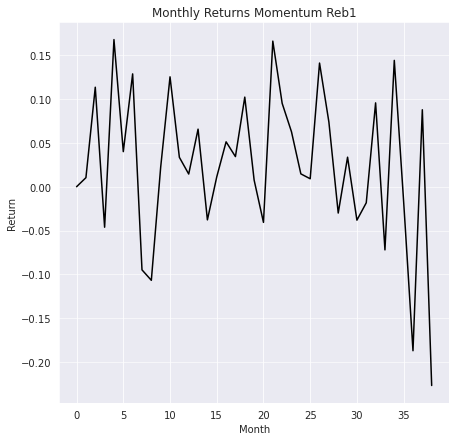

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_7['Ritorno_Mensile'],color="black")
stringa='Monthly Returns Momentum Reb1'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Month')
plt.ylabel('Return')
plt.title(stringa)

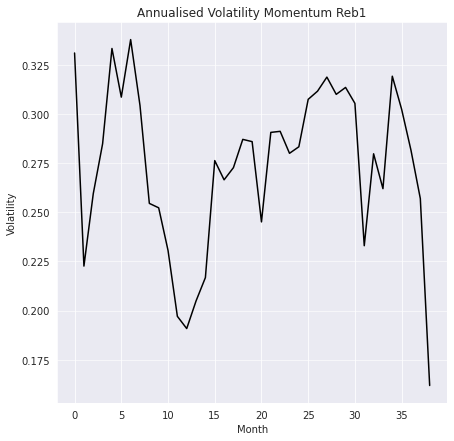

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
plt.plot(ritorni_7['Volatilita_Mese_Successivo'],color="black")
stringa='Annualised Volatility Momentum Reb1'
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Month')
plt.ylabel('Volatility')
plt.title(stringa)
pylab.show()

Text(0, 0.5, 'Frequency')

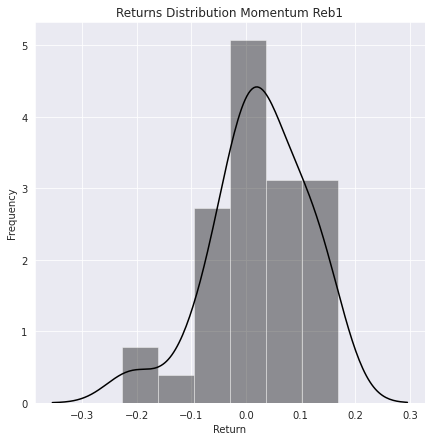

In [ ]:
plt.rcParams['figure.figsize'] = [7,7]
stringa='Returns Distribution Momentum Reb1'
plt.title(stringa)
sns.set_style('darkgrid')
sns.distplot(ritorni_7['Ritorno_Mensile'],color="black")
plt.xlabel('Return')
plt.ylabel('Frequency')

In [ ]:
skew(ritorni_7['Ritorno_Mensile'])

-0.6735507525105691

In [ ]:
#Il Value at Risk (VaR) rappresenta la massima perdita potenziale di un asset o di un portafoglio dato un determinato orizzonte temporale e uno specifico intervallo di confidenza
var_90=ritorni_7['Ritorno_Mensile'].quantile(0.1)
var_95=ritorni_7['Ritorno_Mensile'].quantile(0.05)
var_99=ritorni_7['Ritorno_Mensile'].quantile(0.01)
print(tabulate([["90%",var_90],["95%",var_95],["99%",var_99]],
                headers=['livello di confidenza','value at risk']))

livello di confidenza      value at risk
-----------------------  ---------------
90%                           -0.0766249
95%                           -0.114811
99%                           -0.211718


In [ ]:
ritorno_max=ritorni_7.iloc[ritorni_7['Ritorno_Mensile'].astype(float).idxmax()]
ritorno_max

Ritorno_Mensile               0.167877
Volatilita_Mese_Successivo    0.333184
ER_Mese_Successivo            0.384437
Name: 4, dtype: float64

In [ ]:
rischio_min=ritorni_7.iloc[ritorni_7['Ritorno_Mensile'].astype(float).idxmin()]
rischio_min

Ritorno_Mensile              -0.226793
Volatilita_Mese_Successivo    0.161902
ER_Mese_Successivo            0.125062
Name: 38, dtype: float64

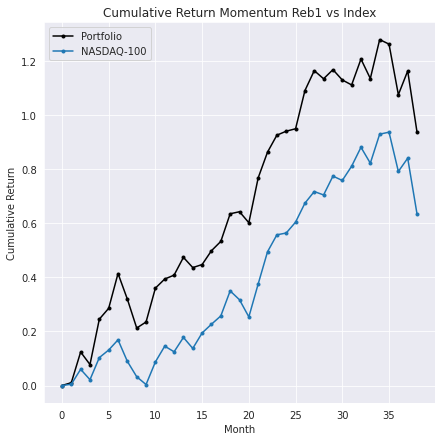

In [ ]:
cdf_p=np.cumsum(ritorni_7['Ritorno_Mensile'])
cdf_i=np.cumsum(index_ret_men['Ritorno'])
plt.plot(cdf_p, marker=".",label="Portfolio", color="black")
plt.plot(cdf_i,marker=".",label="NASDAQ-100")
plt.xlabel("Month")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Return Momentum Reb1 vs Index")
plt.legend()
plt.show()

# PLOT RENDIMENTO PORTAFOGLI (1-5) VS. INDICE

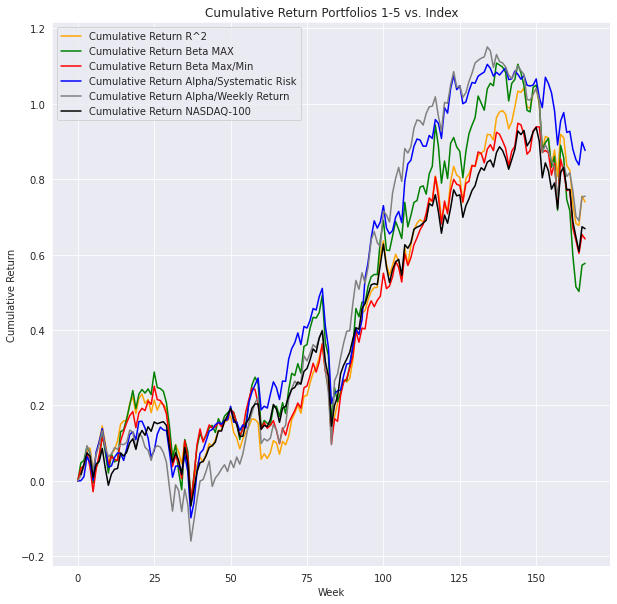

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Cumulative Return Portfolios 1-5 vs. Index")
cdf_r=np.cumsum(ritorni_1['Ritorno_Settimanale'])
cdf_b=np.cumsum(ritorni_2['Ritorno_Settimanale'])
cdf_bm=np.cumsum(ritorni_3['Ritorno_Settimanale'])
cdf_a_ris=np.cumsum(ritorni_4['Ritorno_Settimanale'])
cdf_a_ret = np.cumsum(ritorni_5['Ritorno_Settimanale'])
cdf_index = np.cumsum(ritorni_set_index['Ritorno_Settimanale'])
plt.plot(cdf_r,color="orange",label="Cumulative Return R^2")
plt.plot(cdf_b, color='green',label="Cumulative Return Beta MAX")
plt.plot(cdf_bm, color='red',label="Cumulative Return Beta Max/Min")
plt.plot(cdf_a_ris, color='blue',label="Cumulative Return Alpha/Systematic Risk")
plt.plot(cdf_a_ret, color='grey',label="Cumulative Return Alpha/Weekly Return")
plt.plot(cdf_index, color='black',label="Cumulative Return NASDAQ-100")
plt.ylabel("Cumulative Return")
plt.xlabel("Week")
plt.legend()
plt.show()

CONFRONTO TRA PORTAFOGLI CON INDICE BETA E BETA MAX/MIN

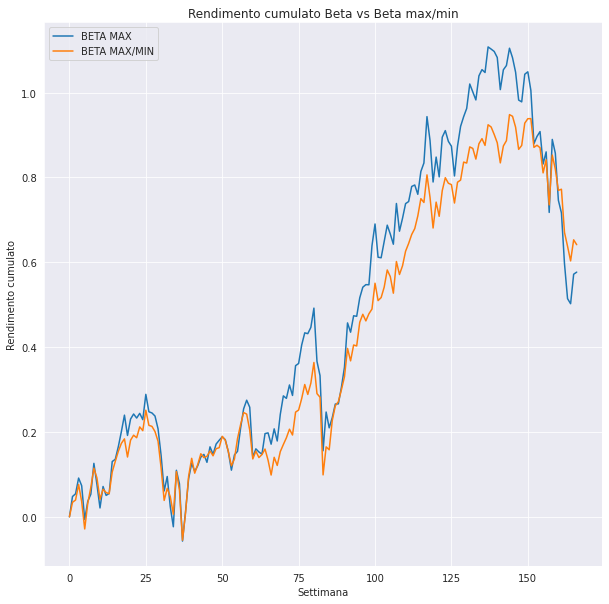

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Rendimento cumulato portafogli Beta max e Beta max/min")
plt.plot(cdf_b, label="BETA MAX")
plt.plot(cdf_bm,label="BETA MAX/MIN")
plt.xlabel("Settimana")
plt.ylabel("Rendimento cumulato")
plt.title("Rendimento cumulato Beta vs Beta max/min")
plt.legend()
plt.show()

# SIMULAZIONE REALE (SVILUPPO FUTURO, NON PARTE DEL PROGETTO)

In [ ]:
tickers = all_alpha.sort_values(by='Value', ascending=False)[0:10]['Ticker'].to_list()
portfolio = pd.DataFrame([[0.10]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)
portfolio['Shares'] = 0
portfolio
budget = 100000
num_shares = []
spesa_totale = 0
for index, row in portfolio.iterrows():
  num_shares_i = budget * 0.10 / float(stocks[index].iloc[181])
  num_shares_i = np.floor(num_shares_i)
  portfolio.at[index, 'Shares'] = num_shares_i
  spesa_totale = spesa_totale + (num_shares_i * float(stocks[index].iloc[181]))
print(portfolio)
print("Totale Speso: " + str(spesa_totale))
print("Soldi rimasti: " + str(budget-spesa_totale))
budget = budget-spesa_totale

      Weights  Shares
ODFL      0.1     113
DLTR      0.1      91
PYPL      0.1     135
CPRT      0.1     230
MNST      0.1     156
MAR       0.1      74
VRSN      0.1      87
NXPI      0.1      85
KHC       0.1     127
SWKS      0.1     103
Totale Speso: 99534.9529
Soldi rimasti: 465.04709999999614


In [ ]:
start = 181
delta = 7
endperiod = 1342
contatore_settimane = 1
for i in range(start, endperiod,7):
  tickers = portfolio.index
  #start = start + delta METTERE ALLA FINE
  all_alpha_rebalancing = pd.DataFrame(columns = ['Value', 'Ticker'])
  for column in stocks_ret_gio:
    X_sm = sm.add_constant(index_ret_gio[start:start+delta])
    model = sm.OLS(stocks_ret_gio[column][start:start+delta],X_sm)
    result = model.fit()
    row = pd.DataFrame([[result.params.const , column]], columns=['Value', 'Ticker'])
    all_alpha_rebalancing = all_alpha_rebalancing.append(row)

  tickers_new = all_alpha_rebalancing.sort_values(by='Value', ascending=False)[0:10]['Ticker'].to_list()

  #VENDI QUELLI CHE NON CI SONO PIU'
  for i in range(0,10):
    if tickers[i] not in tickers_new:
      budget = budget + portfolio.at[tickers[i], 'Shares'] * float(stocks[tickers[i]].iloc[start+delta])
      portfolio = portfolio.drop(tickers[i], axis=0)

  #COMPRA QUELLI CHE MANCANO
  spesa_totale = 0
  for i in range(0,10):
    if tickers_new[i] not in tickers:
        num_shares_i = budget * 0.10 / float(stocks[tickers_new[i]].iloc[start+delta])
        num_shares_i = np.floor(num_shares_i)
        new_stock = pd.DataFrame({'Weights':0.10, 'Shares': num_shares_i}, index = [tickers_new[i]])
        spesa = num_shares_i * float(stocks[tickers_new[i]].iloc[start+delta])
        spesa_totale = spesa_totale + spesa
        portfolio = portfolio.append(new_stock)
  budget = budget - spesa_totale

  #RIBILANCIA I PESI
  spesa_totale = 0
  valore_tot = 0
  w_reb = 0.02
  contatore = 0


  while contatore < 10:
    contatore = 0
    valore_tot = 0
    for i in range(0,10):
      valore_tot = valore_tot + (portfolio.at[portfolio.index[i], 'Shares'] * float(stocks[portfolio.index[i]].iloc[start+delta]))
    for i in range(0, 10):
      act_w = portfolio.at[tickers_new[i], 'Shares'] * float(stocks[tickers_new[i]].iloc[start+delta]) / valore_tot
      diff_w = act_w - 0.10
      if abs(diff_w) >= w_reb:
        if diff_w > 0:
          num_shares_i = diff_w * portfolio.at[tickers_new[i], 'Shares'] / act_w
          num_shares_i = np.floor(num_shares_i)
          if num_shares_i < 1:
            num_shares_i = 1
          portfolio.at[tickers_new[i], 'Weights'] = 0.10
          portfolio.at[tickers_new[i], 'Shares'] = portfolio.at[tickers_new[i], 'Shares'] - num_shares_i
          budget = budget + num_shares_i * float(stocks[tickers_new[i]].iloc[start+delta])
        elif diff_w < 0:
          diff_w = abs(diff_w)
          if(budget >= float(stocks[tickers_new[i]].iloc[start+delta])*diff_w):
            num_shares_i = budget * diff_w / float(stocks[tickers_new[i]].iloc[start+delta])
            num_shares_i = np.floor(num_shares_i)
            if num_shares_i < 1 and budget >= float(stocks[tickers_new[i]].iloc[start+delta]) :
              num_shares_i = 1
            portfolio.at[tickers_new[i], 'Weights'] = 0.10
            portfolio.at[tickers_new[i], 'Shares'] = portfolio.at[tickers_new[i], 'Shares'] + num_shares_i
            spesa = num_shares_i * float(stocks[tickers_new[i]].iloc[start+delta])
            spesa_totale = spesa_totale + spesa
            budget = budget - spesa_totale
          else: contatore = contatore + 1
      else: contatore = contatore + 1
  print('Risultati settimana ', contatore_settimane, '\n')
  contatore_settimane += 1
  start = start + delta
  print('Valore attuale portfolio:', np.round(valore_tot, 2), '\n')
  print('Budget a disposizione:', np.round(budget, 2), '\n')
  print('Titoli nel portfolio: \n')
  for i in range(0,10):
    print(portfolio.index[i], 'n.Shares:', int(portfolio.at[portfolio.index[i], 'Shares']))
  print('----------------------------------------------------- \n')
  somma = 0
  for i in range(0,10): 
      if (contatore_settimane <= 165):
        act_w = portfolio.at[portfolio.index[i], 'Shares'] * float(stocks[portfolio.index[i]].iloc[start+delta]) / valore_tot
        print('Peso effettivo', portfolio.index[i], ':', act_w)
        somma = somma + act_w
      elif(contatore_settimane == 166):
        act_w = portfolio.at[portfolio.index[i], 'Shares'] * float(stocks[portfolio.index[i]].iloc[start]) / valore_tot
        print('Peso effettivo', portfolio.index[i], ':', act_w)
        somma = somma + act_w

  print('Somma dei pesi', somma)
  print('----------------------------------------------------- \n')


Streaming output truncated to the last 5000 lines.
Titoli nel portfolio: 

ODFL n.Shares: 77
NXPI n.Shares: 74
ALGN n.Shares: 28
MU n.Shares: 152
AMD n.Shares: 653
LULU n.Shares: 81
QCOM n.Shares: 147
FAST n.Shares: 315
ORLY n.Shares: 30
AMGN n.Shares: 48
----------------------------------------------------- 

Peso effettivo ODFL : 0.09711691332452832
Peso effettivo NXPI : 0.1021409616972588
Peso effettivo ALGN : 0.11083108565584385
Peso effettivo MU : 0.11357827688747436
Peso effettivo AMD : 0.1077722021483241
Peso effettivo LULU : 0.10217810204124404
Peso effettivo QCOM : 0.10250412499648451
Peso effettivo FAST : 0.0990858997042327
Peso effettivo ORLY : 0.09800751608305273
Peso effettivo AMGN : 0.10331846585061809
Somma dei pesi 1.0365335483890614
----------------------------------------------------- 

Risultati settimana  16 

Valore attuale portfolio: 63533.91 

Budget a disposizione: 32152.97 

Titoli nel portfolio: 

ODFL n.Shares: 62
ALGN n.Shares: 22
MU n.Shares: 114
AMD n.Shar

 ## Simulazione reale prendendo solo con stocks che costano < 200

In [ ]:
tickers = all_beta.sort_values(by='Value', ascending=False)[0:10]['Ticker'].to_list()
portfolio = pd.DataFrame([[0.10]], index=tickers)
portfolio.rename(columns={0:'Weights'}, inplace=True)
portfolio['Shares'] = 0
portfolio
budget = 100000
num_shares = []
spesa_totale = 0
for index, row in portfolio.iterrows():
  num_shares_i = budget * 0.10 / float(stocks[index].iloc[181])
  num_shares_i = np.floor(num_shares_i)
  portfolio.at[index, 'Shares'] = num_shares_i
  spesa_totale = spesa_totale + (num_shares_i * float(stocks[index].iloc[181]))
print(portfolio)
print("Totale Speso: " + str(spesa_totale))
print("Soldi rimasti: " + str(budget-spesa_totale))
budget = budget-spesa_totale

      Weights  Shares
NVDA      0.1     204
AMD       0.1     948
MU        0.1     226
AMAT      0.1     192
MELI      0.1      31
LRCX      0.1      53
NFLX      0.1      52
ALGN      0.1      44
JD        0.1     237
AVGO      0.1      38
Totale Speso: 99234.12
Soldi rimasti: 765.8800000000047


In [ ]:
start = 181
delta = 7
endperiod = 1342
contatore_settimane = 1
for i in range(start, endperiod,7):
  tickers = portfolio.index
  #start = start + delta METTERE ALLA FINE
  all_alpha_rebalancing = pd.DataFrame(columns = ['Value', 'Ticker'])
  for column in stocks_ret_gio:
    X_sm = sm.add_constant(index_ret_gio[start:start+delta])
    model = sm.OLS(stocks_ret_gio[column][start:start+delta],X_sm)
    result = model.fit()
    row = pd.DataFrame([[result.params.NASDAQ , column]], columns=['Value', 'Ticker'])
    if(float(stocks[column].iloc[start+delta]) < 200):
      all_alpha_rebalancing = all_alpha_rebalancing.append(row)

  tickers_new = all_alpha_rebalancing.sort_values(by='Value', ascending=False)[0:10]['Ticker'].to_list()

  #VENDI QUELLI CHE NON CI SONO PIU'
  for i in range(0,10):
    if tickers[i] not in tickers_new:
      budget = budget + portfolio.at[tickers[i], 'Shares'] * float(stocks[tickers[i]].iloc[start+delta])
      portfolio = portfolio.drop(tickers[i], axis=0)

  #COMPRA QUELLI CHE MANCANO
  spesa_totale = 0
  for i in range(0,10):
    if tickers_new[i] not in tickers:
        num_shares_i = budget * 0.10 / float(stocks[tickers_new[i]].iloc[start+delta])
        num_shares_i = np.floor(num_shares_i)
        new_stock = pd.DataFrame({'Weights':0.10, 'Shares': num_shares_i}, index = [tickers_new[i]])
        spesa = num_shares_i * float(stocks[tickers_new[i]].iloc[start+delta])
        spesa_totale = spesa_totale + spesa
        portfolio = portfolio.append(new_stock)
  budget = budget - spesa_totale

  #RIBILANCIA I PESI
  spesa_totale = 0
  valore_tot = 0
  w_reb = 0.005
  contatore = 0


  while contatore < 10:
    contatore = 0
    valore_tot = 0
    for i in range(0,10):
      valore_tot = valore_tot + (portfolio.at[portfolio.index[i], 'Shares'] * float(stocks[portfolio.index[i]].iloc[start+delta]))
    for i in range(0, 10):
      act_w = portfolio.at[tickers_new[i], 'Shares'] * float(stocks[tickers_new[i]].iloc[start+delta]) / valore_tot
      diff_w = act_w - 0.10
      if abs(diff_w) >= w_reb:
        if diff_w > 0:
          num_shares_i = diff_w * portfolio.at[tickers_new[i], 'Shares'] / act_w
          num_shares_i = np.floor(num_shares_i)
          if num_shares_i < 1:
            num_shares_i = 1
          portfolio.at[tickers_new[i], 'Weights'] = 0.10
          portfolio.at[tickers_new[i], 'Shares'] = portfolio.at[tickers_new[i], 'Shares'] - num_shares_i
          budget = budget + num_shares_i * float(stocks[tickers_new[i]].iloc[start+delta])
        elif diff_w < 0:
          diff_w = abs(diff_w)
          if(budget >= float(stocks[tickers_new[i]].iloc[start+delta])*diff_w):
            num_shares_i = budget * diff_w / float(stocks[tickers_new[i]].iloc[start+delta])
            num_shares_i = np.floor(num_shares_i)
            if num_shares_i < 1 and budget >= float(stocks[tickers_new[i]].iloc[start+delta]) :
              num_shares_i = 1
            portfolio.at[tickers_new[i], 'Weights'] = 0.10
            portfolio.at[tickers_new[i], 'Shares'] = portfolio.at[tickers_new[i], 'Shares'] + num_shares_i
            spesa = num_shares_i * float(stocks[tickers_new[i]].iloc[start+delta])
            spesa_totale = spesa_totale + spesa
            budget = budget - spesa_totale
          else: contatore = contatore + 1
      else: contatore = contatore + 1
  print('Risultati settimana ', contatore_settimane, '\n')
  contatore_settimane += 1
  start = start + delta
  print('Valore attuale portfolio:', np.round(valore_tot, 2), '\n')
  print('Budget a disposizione:', np.round(budget, 2), '\n')
  print('Titoli nel portfolio: \n')
  for i in range(0,10):
    print(portfolio.index[i], 'n.Shares:', int(portfolio.at[portfolio.index[i], 'Shares']))
  print('----------------------------------------------------- \n')
  somma = 0
  for i in range(0,10): 
      if (contatore_settimane <= 165):
        act_w = portfolio.at[portfolio.index[i], 'Shares'] * float(stocks[portfolio.index[i]].iloc[start+delta]) / valore_tot
        print('Peso effettivo', portfolio.index[i], ':', act_w)
        somma = somma + act_w
      elif(contatore_settimane == 166):
        act_w = portfolio.at[portfolio.index[i], 'Shares'] * float(stocks[portfolio.index[i]].iloc[start]) / valore_tot
        print('Peso effettivo', portfolio.index[i], ':', act_w)
        somma = somma + act_w

  print('Somma dei pesi', somma)
  print('----------------------------------------------------- \n')


Risultati settimana  1 

Valore attuale portfolio: 65490.15 

Budget a disposizione: -3801.96 

Titoli nel portfolio: 

NVDA n.Shares: 127
AMD n.Shares: 571
MU n.Shares: 150
AMAT n.Shares: 125
JD n.Shares: 155
TEAM n.Shares: 129
SGEN n.Shares: 115
MRVL n.Shares: 281
SWKS n.Shares: 63
SPLK n.Shares: 70
----------------------------------------------------- 

Peso effettivo NVDA : 0.10810197762175008
Peso effettivo AMD : 0.10480079428735489
Peso effettivo MU : 0.09805290955766213
Peso effettivo AMAT : 0.10201915471184772
Peso effettivo JD : 0.10981803714688251
Peso effettivo TEAM : 0.10355037728763879
Peso effettivo SGEN : 0.09194359411516105
Peso effettivo MRVL : 0.10229079860517962
Peso effettivo SWKS : 0.09736166059469781
Peso effettivo SPLK : 0.09581287812698254
Somma dei pesi 1.0137521820551572
----------------------------------------------------- 

Risultati settimana  2 

Valore attuale portfolio: 50555.04 

Budget a disposizione: 10029.23 

Titoli nel portfolio: 

AMAT n.Shares: 9

KeyboardInterrupt: ignored